<h1>Preprocesiranje</h1>

In [19]:
from xml.sax import default_parser_list
import numpy as np
import pandas as pd
import copy
from sklearn import metrics 
from sklearn import preprocessing
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
%matplotlib inline

import imblearn
from imblearn.over_sampling import SMOTE
from typing import Counter

from sklearn.metrics import confusion_matrix
#from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import RocCurveDisplay
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import KFold, cross_val_score

import seaborn as sns
from sklearn.ensemble import AdaBoostClassifier

In [20]:
# from typing import Counter
from xml.sax import default_parser_list
import numpy as nm
import matplotlib.pyplot as mtp
import pandas as pd
import copy

data_set_balanced_labeled = pd.read_csv('C:\\Users\\Ana\\Desktop\\master\\masinsko ucenje\\projekat 1\\adult_balanced.csv')
data_set= pd.read_csv('C:\\Users\\Ana\\Desktop\\master\\masinsko ucenje\\projekat 1\\adult.csv')
data_set_test= pd.read_csv('C:\\Users\\Ana\\Desktop\\master\\masinsko ucenje\\projekat 1\\adult_test.csv')

df = pd.DataFrame(data_set)
df_test = pd.DataFrame(data_set_test)
df_test.drop(columns= df_test.columns[0], axis= 1, inplace= True)

df = df.drop(['Education-num'], axis = 1)
df_test = df_test.drop(['Education-num'], axis = 1)

#menjanje '?' sa NaN
df['Native-country'] = df['Native-country'].replace('?',nm.nan)
df['Workclass'] = df['Workclass'].replace('?',nm.nan)
df['Occupation'] = df['Occupation'].replace('?',nm.nan)

df_test['Native-country'] = df_test['Native-country'].replace('?',nm.nan)
df_test['Workclass'] = df_test['Workclass'].replace('?',nm.nan)
df_test['Occupation'] = df_test['Occupation'].replace('?',nm.nan)

# Menjamo vrednosti koji nedostaju vrednostima koje se najcesce javljaju
df_test['Native-country'] = df_test['Native-country'].replace(nm.nan, df_test['Native-country'].mode().iloc[0])
df_test['Workclass'] = df_test['Workclass'].replace(nm.nan, df_test['Workclass'].mode().iloc[0])
df_test['Occupation'] = df_test['Occupation'].replace(nm.nan, df_test['Occupation'].mode().iloc[0])

df['Native-country'] = df['Native-country'].replace(nm.nan, df['Native-country'].mode().iloc[0])
df['Workclass'] = df['Workclass'].replace(nm.nan, df['Workclass'].mode().iloc[0])
df['Occupation'] = df['Occupation'].replace(nm.nan, df['Occupation'].mode().iloc[0])

# Mapiranje na numericke vrednosti
df['Income'] = df['Income'].map({'<=50K': 0, '>50K': 1}).astype(int)
df_test['Income'] = df_test['Income'].map({'<=50K.': 0, '>50K.': 1}).astype(int)

<h2>Label encoding</h2>

In [21]:
df_labeled = copy.copy(df)
label_encoder = preprocessing.LabelEncoder()

df_labeled['Workclass'] = label_encoder.fit_transform(df_labeled['Workclass'])
df_labeled['Education'] = label_encoder.fit_transform(df_labeled['Education'])
df_labeled['Martial-status'] = label_encoder.fit_transform(df_labeled['Martial-status'])
df_labeled['Occupation'] = label_encoder.fit_transform(df_labeled['Occupation'])
df_labeled['Relationship'] = label_encoder.fit_transform(df_labeled['Relationship'])
df_labeled['Race'] = label_encoder.fit_transform(df_labeled['Race'])
df_labeled['Sex'] = label_encoder.fit_transform(df_labeled['Sex'])
df_labeled['Native-country'] = label_encoder.fit_transform(df_labeled['Native-country'])

In [22]:
df_labeled_test = copy.copy(df_test);

df_labeled_test['Workclass'] = label_encoder.fit_transform(df_labeled_test['Workclass'])
df_labeled_test['Education'] = label_encoder.fit_transform(df_labeled_test['Education'])
df_labeled_test['Martial-status'] = label_encoder.fit_transform(df_labeled_test['Martial-status'])
df_labeled_test['Occupation'] = label_encoder.fit_transform(df_labeled_test['Occupation'])
df_labeled_test['Relationship'] = label_encoder.fit_transform(df_labeled_test['Relationship'])
df_labeled_test['Race'] = label_encoder.fit_transform(df_labeled_test['Race'])
df_labeled_test['Sex'] = label_encoder.fit_transform(df_labeled_test['Sex'])
df_labeled_test['Native-country'] = label_encoder.fit_transform(df_labeled_test['Native-country'])

In [23]:
df_labeled_unbalanced = copy.copy(df_labeled)

<h3>Balasiranje label encoding dataset-a</h3>

In [24]:
less = len(df_labeled[df_labeled['Income'] == 0])
more = len(df_labeled[df_labeled['Income'] == 1])
class_distribution_ration = less/more
x = df_labeled.drop(["Income"], axis = 1)
y = df_labeled["Income"]

#Transformacija dataset-a
oversample = SMOTE()
X, Y = oversample.fit_resample(x, y)

frames = [X, Y]
df_labeled = pd.concat(frames, axis=1, join='inner')

<h1>Vizuelizacija podataka</h1>

Attributes Education and Education-num in original dataset
Education-num  1    2    3    4    5    6     7    8      9     10    11  \
Education                                                                  
10th            0    0    0    0    0  933     0    0      0     0     0   
11th            0    0    0    0    0    0  1175    0      0     0     0   
12th            0    0    0    0    0    0     0  433      0     0     0   
1st-4th         0  168    0    0    0    0     0    0      0     0     0   
5th-6th         0    0  333    0    0    0     0    0      0     0     0   
7th-8th         0    0    0  646    0    0     0    0      0     0     0   
9th             0    0    0    0  514    0     0    0      0     0     0   
Assoc-acdm      0    0    0    0    0    0     0    0      0     0     0   
Assoc-voc       0    0    0    0    0    0     0    0      0     0  1382   
Bachelors       0    0    0    0    0    0     0    0      0     0     0   
Doctorate       0    0    0  

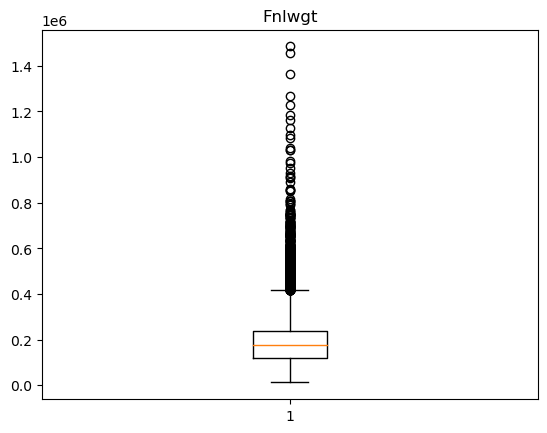

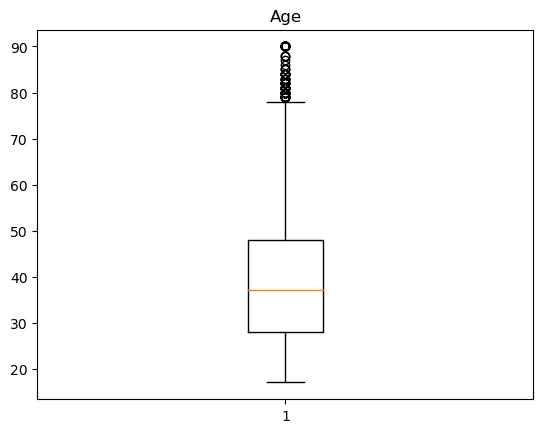

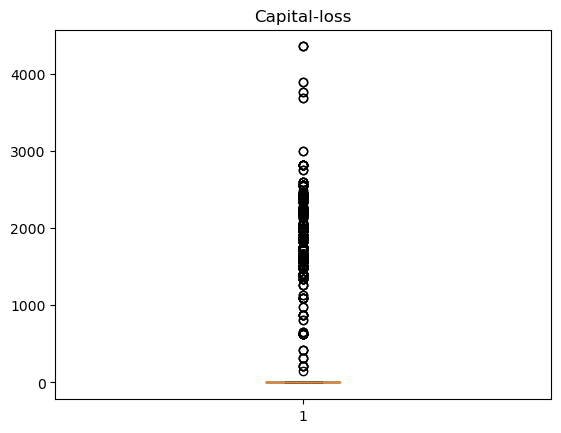

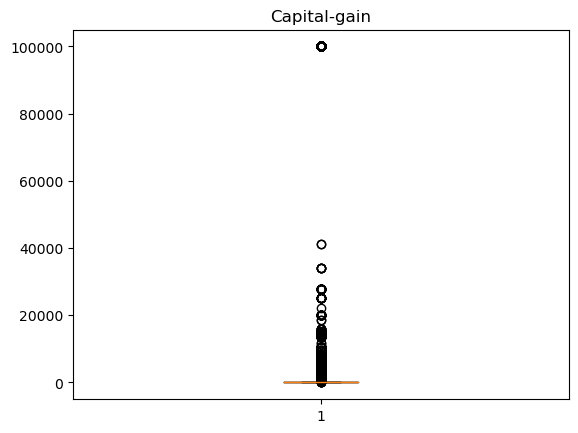

In [25]:
#Odnos izmedju Education i Education-num
print("Attributes Education and Education-num in original dataset")
print(pd.crosstab(index=data_set["Education"], columns=data_set["Education-num"]))

#Vrednosti van granica kod atributa Fnlwgt
plt.boxplot(df['Fnlwgt'])
plt.title("Fnlwgt")
plt.show()

plt.title("Age")
plt.boxplot(df['Age'])
plt.show()

plt.title("Capital-loss")
plt.boxplot(df['Capital-loss'])
plt.show()

plt.title("Capital-gain")
plt.boxplot(df['Capital-gain'])
plt.show()

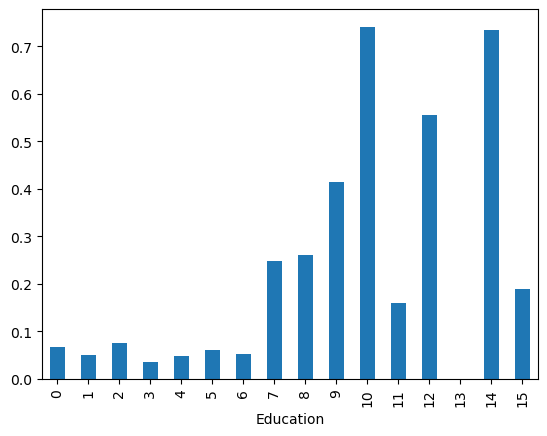

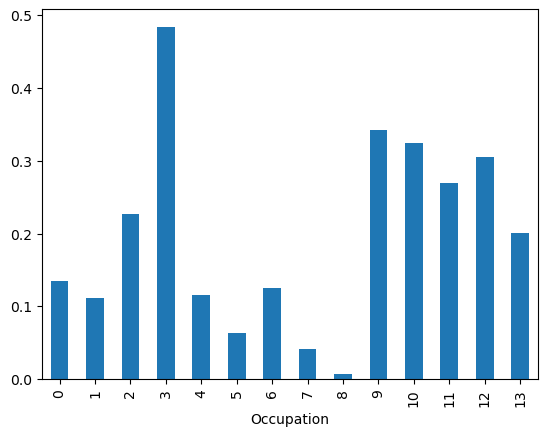

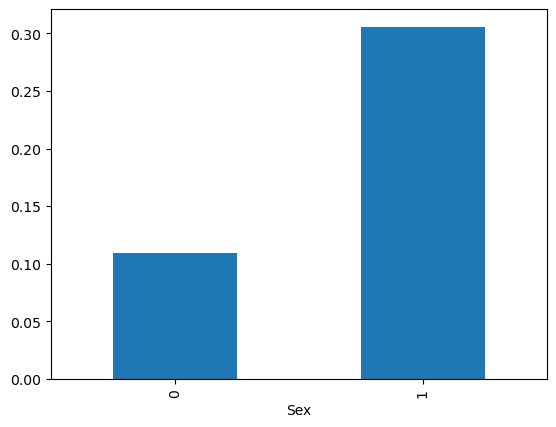

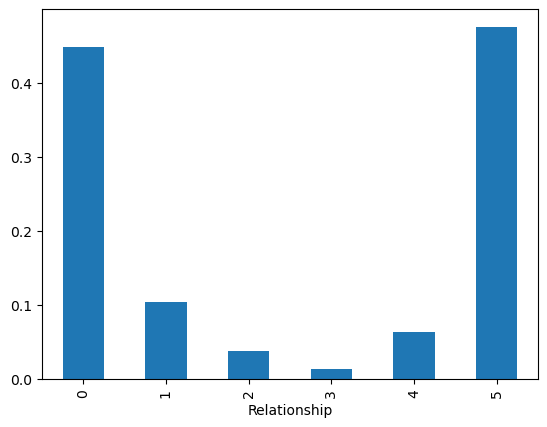

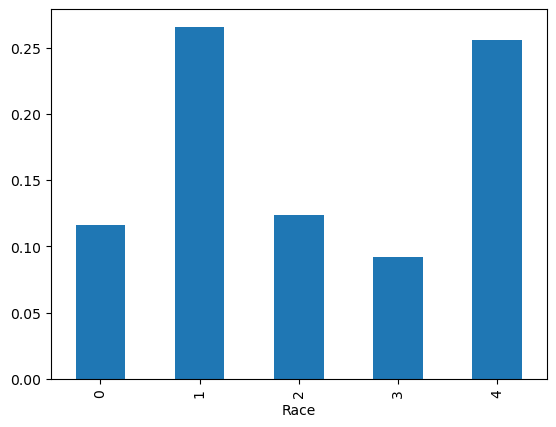

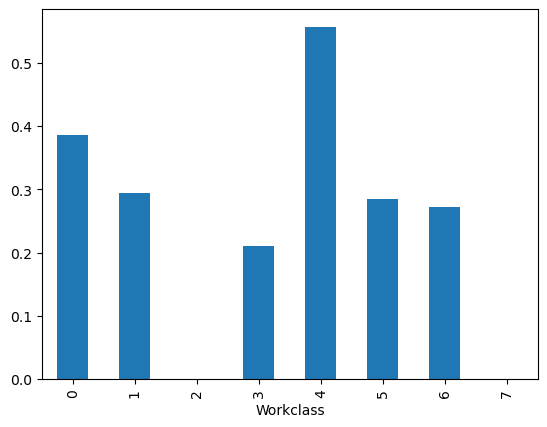

In [26]:
df_labeled_unbalanced.groupby('Education').Income.mean().plot(kind='bar')
plt.show()

df_labeled_unbalanced.groupby('Occupation').Income.mean().plot(kind='bar')
plt.show()

df_labeled_unbalanced.groupby('Sex').Income.mean().plot(kind='bar')
plt.show()

df_labeled_unbalanced.groupby('Relationship').Income.mean().plot(kind='bar')
plt.show()

df_labeled_unbalanced.groupby('Race').Income.mean().plot(kind='bar')
plt.show()

df_labeled_unbalanced.groupby('Workclass').Income.mean().plot(kind='bar')
plt.show()

<h2>One-hot encoding</h2>

In [27]:
#one hot za training set
df["Native-country"] = df["Native-country"].map(
    lambda x: "North-America"
    if x in ("United-States", "Canada")
    else "America"
    if x
    in (
        "Cuba",
        "Jamaica",
        "Mexico",
        "South",
        "Puerto-Rico",
        "Honduras",
        "Columbia",
        "Ecuador",
        "Haiti",
        "Dominican-Republic",
        "El-Salvador",
        "Guatemala",
        "Peru",
        "Trinadad&Tobago",
        "Nicaragua",
        "Outlying-US(Guam-USVI-etc)",
    )
    else "Asia"
    if x
    in (
        "India",
        "Iran",
        "Philippines",
        "Cambodia",
        "Thailand",
        "Laos",
        "Taiwan",
        "China",
        "Japan",
        "Vietnam",
        "Hong",
    )
    else "Europe"
    if x
    in (
        "England",
        "Germany",
        "Italy",
        "Poland",
        "Portugal",
        "France",
        "Yugoslavia",
        "Scotland",
        "Greece",
        "Ireland",
        "Hungary",
        "Holand-Netherlands",
    )
    else None
)

In [28]:
# one hot za test set
df_test["Native-country"] = df_test["Native-country"].map(
    lambda x: "North-America"
    if x in ("United-States", "Canada")
    else "America"
    if x
    in (
        "Cuba",
        "Jamaica",
        "Mexico",
        "South",
        "Puerto-Rico",
        "Honduras",
        "Columbia",
        "Ecuador",
        "Haiti",
        "Dominican-Republic",
        "El-Salvador",
        "Guatemala",
        "Peru",
        "Trinadad&Tobago",
        "Nicaragua",
        "Outlying-US(Guam-USVI-etc)",
    )
    else "Asia"
    if x
    in (
        "India",
        "Iran",
        "Philippines",
        "Cambodia",
        "Thailand",
        "Laos",
        "Taiwan",
        "China",
        "Japan",
        "Vietnam",
        "Hong",
    )
    else "Europe"
    if x
    in (
        "England",
        "Germany",
        "Italy",
        "Poland",
        "Portugal",
        "France",
        "Yugoslavia",
        "Scotland",
        "Greece",
        "Ireland",
        "Hungary",
        "Holand-Netherlands",
    )
    else None
)


In [29]:
df = pd.get_dummies(df, columns = ['Sex', 'Relationship', 'Workclass', 'Education', 'Martial-status', 'Occupation', 'Race', 'Native-country'])

In [30]:
df_test = pd.get_dummies(df_test, columns = ['Sex', 'Relationship', 'Workclass', 'Education', 'Martial-status', 'Occupation', 'Race', 'Native-country'])

In [31]:
#izbrisi posle
train_set = df.drop(["Income"], axis = 1)
class_column = df["Income"]
test_set = df_test.drop(["Income"], axis = 1)
class_column_test = df_test["Income"]

<h1>Primena algoritama klasifikacije</h1>

In [32]:
train_set = df.drop(["Income"], axis = 1)
class_column = df["Income"]
test_set = df_test.drop(["Income"], axis = 1)
class_column_test = df_test["Income"]
#Primena-klasifikatora-nad-one-hot-encoding-dataset-om
train_set_labeled = df_labeled.drop(["Income"], axis = 1)
class_column_labeled = df_labeled["Income"]
test_set_labeled = df_labeled_test.drop(["Income"], axis = 1)
class_column_test_labeled = df_labeled_test["Income"]

<h2>Primena klasifikatora nad one-hot encoding dataset-om</h2>

In [36]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

# ONE HOT
# Decision Tree classifer
print("One hot:")
dt = DecisionTreeClassifier()
dt = dt.fit(train_set, class_column)
y_pred = dt.predict(test_set)
print(" Accuracy for Decision Tree Classifier", metrics.accuracy_score(class_column_test, y_pred))

#Cross-validation
k_folds = KFold(n_splits = 10)
scores = cross_val_score(dt, train_set, class_column, cv = k_folds)
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

#Naive Bayes
nb = MultinomialNB()
nb = nb.fit(train_set, class_column)
y_pred = nb.predict(test_set)
print(" Accuracy for Naive Bayes Classifier:", metrics.accuracy_score(class_column_test, y_pred))

#Cross-validation
k_folds = KFold(n_splits = 10)
scores = cross_val_score(nb, train_set, class_column, cv = k_folds)
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

# KNN classifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(train_set, class_column)
y_pred =  knn.predict(test_set)
print(" Accuracy for KNN Classifier:", metrics.accuracy_score(class_column_test, y_pred))

#Cross-validation
k_folds = KFold(n_splits = 10)
scores = cross_val_score(knn, train_set, class_column, cv = k_folds)
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

#Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, max_features='log2')
rf.fit(train_set, class_column)
y_pred = rf.predict(test_set)
print(" Accuracy for Random Forest Classifier:", metrics.accuracy_score(class_column_test, y_pred))

#Cross-validation
k_folds = KFold(n_splits = 10)
scores = cross_val_score(rf, train_set, class_column, cv = k_folds)
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

One hot:
 Accuracy for Decision Tree Classifier 0.8138320741969166
Cross Validation Scores:  [0.80503531 0.81388206 0.8215602  0.80743243 0.80866093 0.81234644
 0.81695332 0.81265356 0.81726044 0.80651106]
Average CV Score:  0.8122295750826607
Number of CV Scores used in Average:  10
 Accuracy for Naive Bayes Classifier: 0.785148332412014
Cross Validation Scores:  [0.77617439 0.78746929 0.78685504 0.77764128 0.78163391 0.79361179
 0.77733415 0.7779484  0.77886978 0.78900491]
Average CV Score:  0.7826542943982304
Number of CV Scores used in Average:  10
 Accuracy for KNN Classifier: 0.7849640685461581
Cross Validation Scores:  [0.77832361 0.78808354 0.79484029 0.78255528 0.78470516 0.79023342
 0.78347666 0.78593366 0.77579853 0.77641278]
Average CV Score:  0.7840362922723991
Number of CV Scores used in Average:  10
 Accuracy for Random Forest Classifier: 0.8506848473680978
Cross Validation Scores:  [0.84249309 0.85995086 0.85042998 0.84152334 0.85718673 0.85288698
 0.85718673 0.85810811

<h2>Primena klasifikatora nad label encoding dataset-om</h2>

In [39]:
# LABEL
# Decision Tree classifer
print("Labeled:")
dt = DecisionTreeClassifier()
dt = dt.fit(train_set_labeled, class_column_labeled)
y_pred = dt.predict(test_set_labeled)
print(" Accuracy for Decision Tree Classifier", metrics.accuracy_score(class_column_test_labeled, y_pred))

#Cross-validation
k_folds = KFold(n_splits = 10)
scores = cross_val_score(dt, train_set, class_column, cv = k_folds)
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

#Naive Bayes
nb = MultinomialNB()
nb = nb.fit(train_set_labeled, class_column_labeled)
y_pred = nb.predict(test_set_labeled)
print(" Accuracy for Naive Bayes Classifier:", metrics.accuracy_score(class_column_test_labeled, y_pred))

#Cross-validation
k_folds = KFold(n_splits = 10)
scores = cross_val_score(nb, train_set, class_column, cv = k_folds)
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

# KNN classifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(train_set_labeled, class_column_labeled)
y_pred =  knn.predict(test_set_labeled)
print(" Accuracy for KNN Classifier:", metrics.accuracy_score(class_column_test_labeled, y_pred))

#Cross-validation
k_folds = KFold(n_splits = 10)
scores = cross_val_score(knn, train_set, class_column, cv = k_folds)
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

#Random Forest Classifier
rf=RandomForestClassifier(n_estimators=100, max_features='log2')
rf.fit(train_set_labeled, class_column_labeled)
y_pred = rf.predict(test_set_labeled)
print(" Accuracy for Random Forest Classifier:", metrics.accuracy_score(class_column_test_labeled, y_pred))

#Cross-validation
k_folds = KFold(n_splits = 10)
scores = cross_val_score(rf, train_set, class_column, cv = k_folds)
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Labeled:
 Accuracy for Decision Tree Classifier 0.770345801854923
Cross Validation Scores:  [0.8108689  0.81203931 0.82555283 0.81142506 0.81019656 0.81603194
 0.81664619 0.81449631 0.81357494 0.80651106]
Average CV Score:  0.8137343099232875
Number of CV Scores used in Average:  10
 Accuracy for Naive Bayes Classifier: 0.785148332412014
Cross Validation Scores:  [0.77617439 0.78746929 0.78685504 0.77764128 0.78163391 0.79361179
 0.77733415 0.7779484  0.77886978 0.78900491]
Average CV Score:  0.7826542943982304
Number of CV Scores used in Average:  10
 Accuracy for KNN Classifier: 0.6497143910079234
Cross Validation Scores:  [0.77832361 0.78808354 0.79484029 0.78255528 0.78470516 0.79023342
 0.78347666 0.78593366 0.77579853 0.77641278]
Average CV Score:  0.7840362922723991
Number of CV Scores used in Average:  10
 Accuracy for Random Forest Classifier: 0.8352066826362017
Cross Validation Scores:  [0.83911575 0.85872236 0.85595823 0.84735872 0.85749386 0.85012285
 0.85135135 0.85964373 

<h1>Hyperparameters tuning</h1>

<h2> Hyperparameters tuning for Random Forest Classifier </h2>

In [18]:
rf=RandomForestClassifier(n_estimators=100)
rf.fit(train_set, class_column)
y_pred = rf.predict(test_set)
print("Accuracy, n_estimators=100:", metrics.accuracy_score(class_column_test, y_pred))

rf=RandomForestClassifier(n_estimators=1000)
rf.fit(train_set, class_column)
y_pred = rf.predict(test_set)
print("Accuracy, n_estimators=1000:", metrics.accuracy_score(class_column_test, y_pred))

rf=RandomForestClassifier(n_estimators=100, max_features='log2')
rf.fit(train_set, class_column)
y_pred = rf.predict(test_set)
print("Accuracy, n_estimators=100, max_features=log2:", metrics.accuracy_score(class_column_test, y_pred))

rf=RandomForestClassifier(n_estimators=1000, max_features='log2')
rf.fit(train_set, class_column)
y_pred = rf.predict(test_set)
print("Accuracy, n_estimators=1000, max_features=log2:", metrics.accuracy_score(class_column_test, y_pred))

rf=RandomForestClassifier(n_estimators=100, max_features='sqrt')
rf.fit(train_set, class_column)
y_pred = rf.predict(test_set)
print("Accuracy, n_estimators=100, max_features=sqrt:", metrics.accuracy_score(class_column_test, y_pred))

rf=RandomForestClassifier(n_estimators=1000, max_features='sqrt')
rf.fit(train_set, class_column)
y_pred = rf.predict(test_set)
print("Accuracy, n_estimators=1000, max_features=sqrt:", metrics.accuracy_score(class_column_test, y_pred))

Accuracy, n_estimators=100: 0.8505620047908605
Accuracy, n_estimators=1000: 0.8517290092746146
Accuracy, n_estimators=100, max_features=log2: 0.8499477919046742
Accuracy, n_estimators=1000, max_features=log2: 0.8517904305632332
Accuracy, n_estimators=100, max_features=sqrt: 0.8522203795835637
Accuracy, n_estimators=1000, max_features=sqrt: 0.852158958294945


In [33]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf,
              'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


<h3>Random Search Training</h3>

In [35]:
from sklearn.ensemble import RandomForestRegressor 

rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose = 2, random_state = 42, n_jobs = -1)
rf_random.fit(train_set, class_column)
rf_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'n_estimators': 800,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 30,
 'bootstrap': False}

<h2>Hyperparameters tuning for Decision Tree Classifier</h2>

In [19]:
for max_d in range(1,21):
  dt = DecisionTreeClassifier(max_depth=max_d, random_state=42)
  dt = dt.fit(train_set, class_column)
  y_pred = dt.predict(test_set)
  print(" Accuracy for Decision Tree Classifier", metrics.accuracy_score(class_column_test, y_pred), ", max depth: ", max_d)

 Accuracy for Decision Tree Classifier 0.7637737239727289 , max depth:  1
 Accuracy for Decision Tree Classifier 0.8068300472943922 , max depth:  2
 Accuracy for Decision Tree Classifier 0.8218782630059579 , max depth:  3
 Accuracy for Decision Tree Classifier 0.8365579509858116 , max depth:  4
 Accuracy for Decision Tree Classifier 0.8477366255144033 , max depth:  5
 Accuracy for Decision Tree Classifier 0.8491493151526319 , max depth:  6
 Accuracy for Decision Tree Classifier 0.8544929672624532 , max depth:  7
 Accuracy for Decision Tree Classifier 0.856704133652724 , max depth:  8
 Accuracy for Decision Tree Classifier 0.8579939807137154 , max depth:  9
 Accuracy for Decision Tree Classifier 0.8584853510226644 , max depth:  10
 Accuracy for Decision Tree Classifier 0.8581782445795713 , max depth:  11
 Accuracy for Decision Tree Classifier 0.8583625084454272 , max depth:  12
 Accuracy for Decision Tree Classifier 0.8571955039616731 , max depth:  13
 Accuracy for Decision Tree Classif

In [20]:
for max_l_nodes in range(40, 60):
  dt = DecisionTreeClassifier(max_leaf_nodes=max_l_nodes, random_state=42)
  dt = dt.fit(train_set, class_column)
  y_pred = dt.predict(test_set)
  print(" Accuracy for Decision Tree Classifier", metrics.accuracy_score(class_column_test, y_pred), "max_leaf_nodes: ", max_l_nodes)

 Accuracy for Decision Tree Classifier 0.8590995639088508 max_leaf_nodes:  40
 Accuracy for Decision Tree Classifier 0.8590995639088508 max_leaf_nodes:  41
 Accuracy for Decision Tree Classifier 0.8590995639088508 max_leaf_nodes:  42
 Accuracy for Decision Tree Classifier 0.8593452490633253 max_leaf_nodes:  43
 Accuracy for Decision Tree Classifier 0.8596523555064185 max_leaf_nodes:  44
 Accuracy for Decision Tree Classifier 0.8596523555064185 max_leaf_nodes:  45
 Accuracy for Decision Tree Classifier 0.8596523555064185 max_leaf_nodes:  46
 Accuracy for Decision Tree Classifier 0.859406670351944 max_leaf_nodes:  47
 Accuracy for Decision Tree Classifier 0.859406670351944 max_leaf_nodes:  48
 Accuracy for Decision Tree Classifier 0.859406670351944 max_leaf_nodes:  49
 Accuracy for Decision Tree Classifier 0.859406670351944 max_leaf_nodes:  50
 Accuracy for Decision Tree Classifier 0.859406670351944 max_leaf_nodes:  51
 Accuracy for Decision Tree Classifier 0.859406670351944 max_leaf_nod

<h2>GridSearch on DecisionTree</h2>

In [20]:
from sklearn import decomposition
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

std_slc = StandardScaler()
pca = decomposition.PCA()
dec_tree = DecisionTreeClassifier()

pipe = Pipeline(steps=[('std_slc', std_slc),
                      ('pca', pca),
                      ('dec_tree', dec_tree)])

n_components = list(range(1,train_set_under_sample.shape[1]+1,1))

criterion = ['gini', 'entropy']
max_depth = [2,4,6,8,10,12]

parameters = dict(pca__n_components=n_components,
                      dec_tree__criterion=criterion,
                      dec_tree__max_depth=max_depth)

clf_GS = GridSearchCV(pipe, parameters)
clf_GS.fit(train_set_under_sample, class_column_under_sample)
    
print('Best Criterion:', clf_GS.best_estimator_.get_params()['dec_tree__criterion'])
print('Best max_depth:', clf_GS.best_estimator_.get_params()['dec_tree__max_depth'])
print('Best Number Of Components:', clf_GS.best_estimator_.get_params()['pca__n_components'])
print(); print(clf_GS.best_estimator_.get_params()['dec_tree']) 

Best Criterion: gini
Best max_depth: 8
Best Number Of Components: 8

DecisionTreeClassifier(max_depth=8)


In [22]:
dt = DecisionTreeClassifier(max_depth = 8)
dt = dt.fit(train_set, class_column)
y_pred = dt.predict(test_set)
print(" Accuracy for Decision Tree Classifier", metrics.accuracy_score(class_column_test, y_pred), ", max depth: 8")

 Accuracy for Decision Tree Classifier 0.8560899207665377 , max depth: 8


<h2>Hyperparameters tuning for KNN Classifier</h2>

Accuracy for KNN Classifier: 0.7280265339966833 n_neigbours:  1
Accuracy for KNN Classifier: 0.7853940175664885 n_neigbours:  2
Accuracy for KNN Classifier: 0.7593513911921872 n_neigbours:  3
Accuracy for KNN Classifier: 0.7892635587494625 n_neigbours:  4
Accuracy for KNN Classifier: 0.7764879307167865 n_neigbours:  5
Accuracy for KNN Classifier: 0.7929488360665807 n_neigbours:  6
Accuracy for KNN Classifier: 0.7849640685461581 n_neigbours:  7
Accuracy for KNN Classifier: 0.7956513727658007 n_neigbours:  8
Accuracy for KNN Classifier: 0.7901234567901234 n_neigbours:  9
Accuracy for KNN Classifier: 0.7978011178674529 n_neigbours:  10
Accuracy for KNN Classifier: 0.7942386831275721 n_neigbours:  11
Accuracy for KNN Classifier: 0.7995209139487747 n_neigbours:  12
Accuracy for KNN Classifier: 0.7971869049812665 n_neigbours:  13
Accuracy for KNN Classifier: 0.8003193907008169 n_neigbours:  14
Accuracy for KNN Classifier: 0.7984767520422579 n_neigbours:  15
Accuracy for KNN Classifier: 0.801

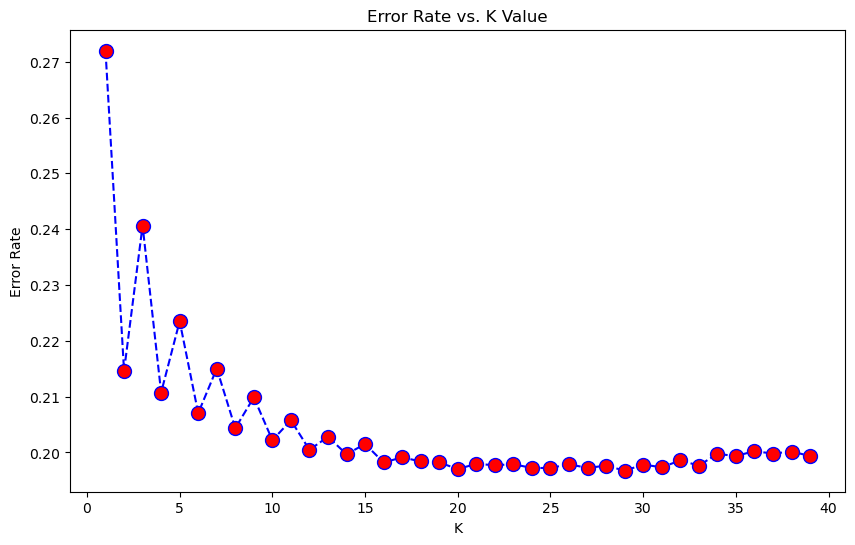

In [21]:
# KNN classifier
error_rate = []

for n_neigh in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=n_neigh)
    knn.fit(train_set, class_column)
    y_pred =  knn.predict(test_set)
    error_rate.append(np.mean(y_pred != class_column_test))
    print("Accuracy for KNN Classifier:", metrics.accuracy_score(class_column_test, y_pred), "n_neigbours: ", n_neigh)
    
plt.figure(figsize=(10, 6))
plt.plot(range(1, 40), error_rate, color='blue', linestyle='dashed', marker = 'o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

Accuracy for KNN Classifier: 0.7280265339966833 n_neigbours:  1
Accuracy for KNN Classifier: 0.7853940175664885 n_neigbours:  2
Accuracy for KNN Classifier: 0.7593513911921872 n_neigbours:  3
Accuracy for KNN Classifier: 0.7892635587494625 n_neigbours:  4
Accuracy for KNN Classifier: 0.7764879307167865 n_neigbours:  5
Accuracy for KNN Classifier: 0.7929488360665807 n_neigbours:  6
Accuracy for KNN Classifier: 0.7849640685461581 n_neigbours:  7
Accuracy for KNN Classifier: 0.7956513727658007 n_neigbours:  8
Accuracy for KNN Classifier: 0.7901234567901234 n_neigbours:  9
Accuracy for KNN Classifier: 0.7978011178674529 n_neigbours:  10
Accuracy for KNN Classifier: 0.7942386831275721 n_neigbours:  11
Accuracy for KNN Classifier: 0.7995209139487747 n_neigbours:  12
Accuracy for KNN Classifier: 0.7971869049812665 n_neigbours:  13
Accuracy for KNN Classifier: 0.8003193907008169 n_neigbours:  14
Accuracy for KNN Classifier: 0.7984767520422579 n_neigbours:  15
Accuracy for KNN Classifier: 0.801

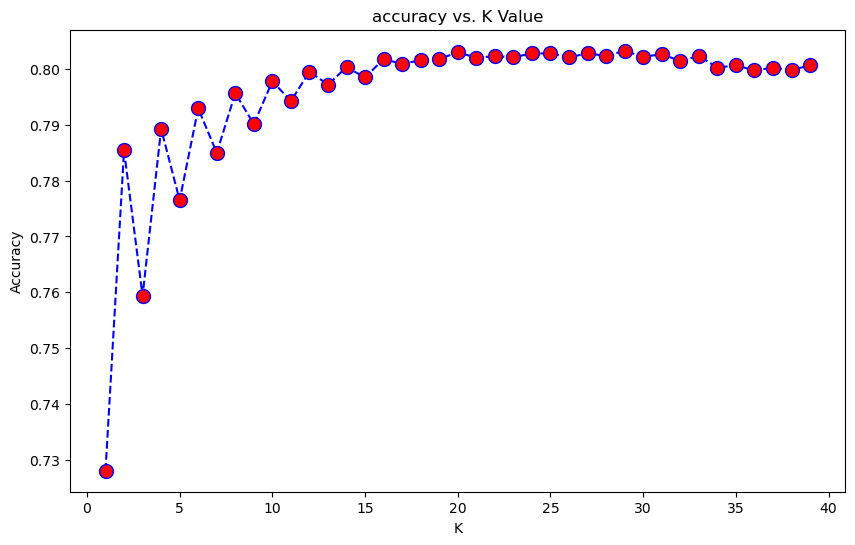

In [22]:
# KNN classifier
acc = []

for n_neigh in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=n_neigh)
    knn.fit(train_set, class_column)
    y_pred =  knn.predict(test_set)
    acc.append(metrics.accuracy_score(class_column_test, y_pred))
    print("Accuracy for KNN Classifier:", metrics.accuracy_score(class_column_test, y_pred), "n_neigbours: ", n_neigh)
    
plt.figure(figsize=(10, 6))
plt.plot(range(1, 40), acc, color='blue', linestyle='dashed', marker = 'o', markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

In [23]:
# KNN classifier
knn = KNeighborsClassifier(metric='manhattan', n_neighbors=28)
knn.fit(train_set, class_column)
y_pred =  knn.predict(test_set)
print("Accuracy for KNN Classifier:", metrics.accuracy_score(class_column_test, y_pred))

Accuracy for KNN Classifier: 0.8037589828634605


In [24]:
# KNN classifier
knn = KNeighborsClassifier(metric='minkowski',n_neighbors= 28)
knn.fit(train_set, class_column)
y_pred =  knn.predict(test_set)
print("Accuracy for KNN Classifier:", metrics.accuracy_score(class_column_test, y_pred))

Accuracy for KNN Classifier: 0.8023462932252319


<h2>Hyperparameters tuning for Gradient Boost Classifier</h2>

In [25]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(train_set, class_column)
    y_pred = gb_clf.predict(test_set)

    print("Learning rate: ", learning_rate)
    print("Accuracy for Gradient Boost Classifier:", metrics.accuracy_score(class_column_test, y_pred))

Learning rate:  0.05
Accuracy for Gradient Boost Classifier: 0.7637737239727289
Learning rate:  0.075
Accuracy for Gradient Boost Classifier: 0.7637737239727289
Learning rate:  0.1
Accuracy for Gradient Boost Classifier: 0.7645722007247712
Learning rate:  0.25
Accuracy for Gradient Boost Classifier: 0.806707204717155
Learning rate:  0.5
Accuracy for Gradient Boost Classifier: 0.8343467845955408
Learning rate:  0.75
Accuracy for Gradient Boost Classifier: 0.834653891038634
Learning rate:  1
Accuracy for Gradient Boost Classifier: 0.8331797801117867


<h3>Balansiranje one-hot encoding dataseta</h3>

In [12]:
df['Income'].value_counts()
less = len(df[df['Income'] == 0])
more = len(df[df['Income'] == 1])
class_distribution_ratio = less/more
# display(class_distribution_ratio)

x = df.drop(["Income"], axis = 1)
y = df["Income"]

import imblearn
from imblearn.over_sampling import SMOTE
#transform the dataset
oversample = SMOTE()
X, Y = oversample.fit_resample(x, y)


<h2>Primena klasifikatora nad one-hot encoding balansiranim dataset-om</h2>

In [42]:
# ONE HOT
# Decision Tree classifer
dt = DecisionTreeClassifier()
dt = dt.fit(X, Y)
y_pred = dt.predict(test_set)
print("Accuracy for Decision Tree Classifier", metrics.accuracy_score(class_column_test, y_pred))

#Cross-validation
k_folds = KFold(n_splits = 10)
scores = cross_val_score(dt, train_set, class_column, cv = k_folds)
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

#Naive Bayes
nb = GaussianNB()
nb = nb.fit(X, Y)
y_pred = nb.predict(test_set)
print("Accuracy for Naive Bayes Classifier:", metrics.accuracy_score(class_column_test, y_pred))

#Cross-validation
k_folds = KFold(n_splits = 10)
scores = cross_val_score(nb, train_set, class_column, cv = k_folds)
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

# KNN classifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X, Y)
y_pred =  knn.predict(test_set)
print("Accuracy for KNN Classifier:", metrics.accuracy_score(class_column_test, y_pred))

#Cross-validation
k_folds = KFold(n_splits = 10)
scores = cross_val_score(knn, train_set, class_column, cv = k_folds)
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

#Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, max_features='log2')
rf.fit(X, Y)
y_pred = rf.predict(test_set)
print("Accuracy for Random Forest Classifier:", metrics.accuracy_score(class_column_test, y_pred))

#Cross-validation
k_folds = KFold(n_splits = 10)
scores = cross_val_score(rf, train_set, class_column, cv = k_folds)
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Accuracy for Decision Tree Classifier 0.8104539033228917
Cross Validation Scores:  [0.80288609 0.81511057 0.81910319 0.80896806 0.80804668 0.80835381
 0.81480344 0.81265356 0.81695332 0.80528256]
Average CV Score:  0.8112161275770425
Number of CV Scores used in Average:  10
Accuracy for Naive Bayes Classifier: 0.7941772618389534
Cross Validation Scores:  [0.78753454 0.79944717 0.79668305 0.79176904 0.79545455 0.8046683
 0.78839066 0.79514742 0.78961916 0.80006143]
Average CV Score:  0.7948775327229427
Number of CV Scores used in Average:  10
Accuracy for KNN Classifier: 0.6510656593575334
Cross Validation Scores:  [0.77832361 0.78808354 0.79484029 0.78255528 0.78470516 0.79023342
 0.78347666 0.78593366 0.77579853 0.77641278]
Average CV Score:  0.7840362922723991
Number of CV Scores used in Average:  10
Accuracy for Random Forest Classifier: 0.8448498249493275
Cross Validation Scores:  [0.84126497 0.85902948 0.85626536 0.84367322 0.85503686 0.84889435
 0.85472973 0.85687961 0.86363636 0

<h1>Evaluacija klasifikatora</h1>

<h2>Evaluacija za nebalansiran dataset</h2>

<h3>Evaluacija za nebalansiran one-hot encoding dataset</h3>

In [31]:
train_set_onehot_unbalanced = train_set

<h4>Evaluacija za Random Forest Classifier</h4>

Accuracy, n_estimators=100: 0.8516061666973773
Cross Validation Scores:  [0.83788763 0.86455774 0.85810811 0.8495086  0.85626536 0.85012285
 0.85472973 0.85964373 0.85964373 0.84858722]
Average CV Score:  0.8539054702817367
Number of CV Scores used in Average:  10


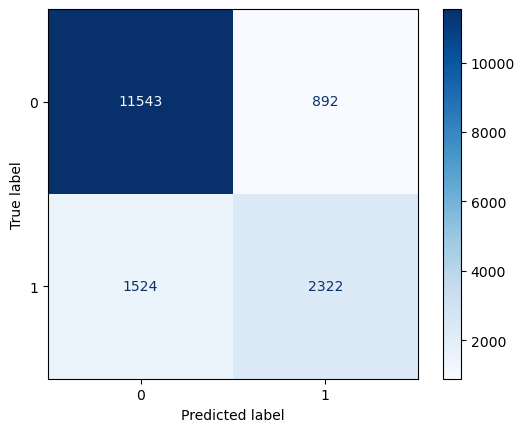

In [44]:
#Random Forest Classifier
rf=RandomForestClassifier(n_estimators=100)
rf.fit(train_set, class_column)
y_pred = rf.predict(test_set)
print("Accuracy, n_estimators=100:", metrics.accuracy_score(class_column_test, y_pred))

#Cross-validation
k_folds = KFold(n_splits = 10)
scores = cross_val_score(rf, train_set, class_column, cv = k_folds)
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
#Nebalansiran one-hot encoding
cm = confusion_matrix(class_column_test, y_pred)
plot_confusion_matrix(rf, test_set, class_column_test, cmap=plt.cm.Blues)
plt.show()

In [29]:
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import cohen_kappa_score

sensitivity = cm[1,1]/(cm[1,1]+cm[1,0])
print('Sensitivity : ', sensitivity )

specificity = cm[0,0]/(cm[0,1]+cm[0,0])
print('Specificity : ', specificity)

precision = cm[1,1]/(cm[0,1]+cm[1,1])
print('Precision : ', precision)

f1 = f1_score(class_column_test, y_pred)
print('F measure: ', f1)

fbeta = fbeta_score(class_column_test, y_pred, beta=0.5)
print('F-beta measure: ', fbeta)

cohen_score = cohen_kappa_score(class_column_test, y_pred)
print('Kappa: ', cohen_score)


Sensitivity :  0.6037441497659907
Specificity :  0.9275432247687978
Precision :  0.7204467887061744
F measure:  0.6569528929127175
F-beta measure:  0.6936312582148405
Kappa:  0.562770428440611


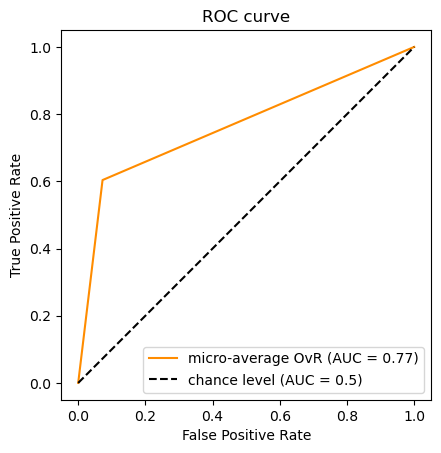

In [30]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(
    class_column_test.ravel(),
    y_pred.ravel(),
    name="micro-average OvR",
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve")
plt.legend()
plt.show()

<h4>Evaluacija za Gradient Boost Classifier</h4>

Learning rate:  0.1
Accuracy for Gradient Boost Classifier: 0.7645722007247712


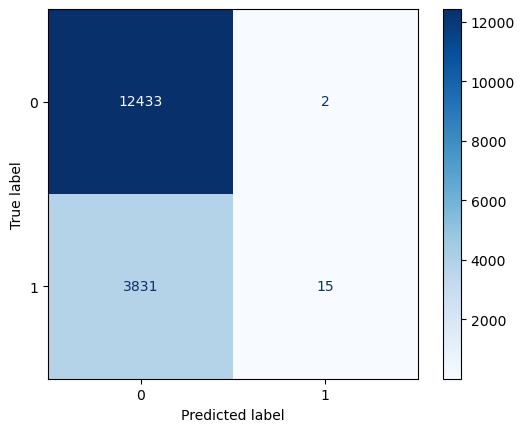

Sensitivity :  0.0039001560062402497
Specificity :  0.9998391636509851
Precision :  0.8823529411764706
F measure:  0.007765984985762361
F-beta measure:  0.019161982626469086
Kappa:  0.00569869966956027


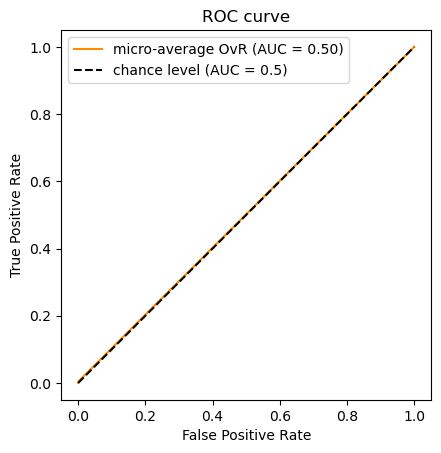

Learning rate:  0.25
Accuracy for Gradient Boost Classifier: 0.806707204717155


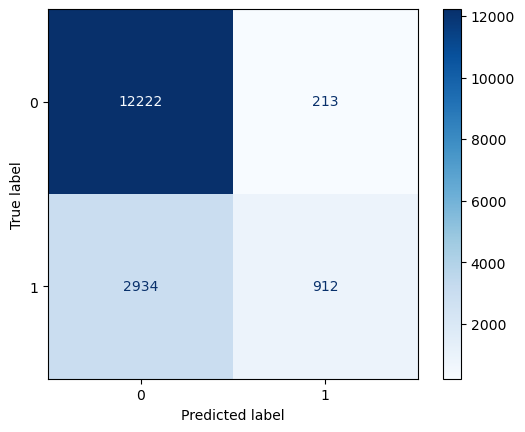

Sensitivity :  0.23712948517940718
Specificity :  0.9828709288299156
Precision :  0.8106666666666666
F measure:  0.36692818346409173
F-beta measure:  0.5463695183321351
Kappa:  0.2911349328523992


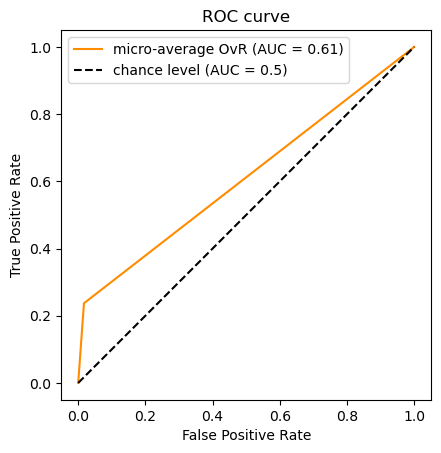

Learning rate:  0.5
Accuracy for Gradient Boost Classifier: 0.8343467845955408


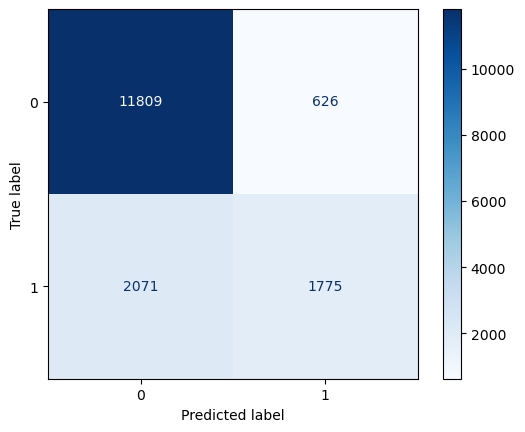

Sensitivity :  0.46151846073842956
Specificity :  0.9496582227583434
Precision :  0.7392753019575177
F measure:  0.5682727709300464
F-beta measure:  0.6598513011152417
Kappa:  0.47248402985550697


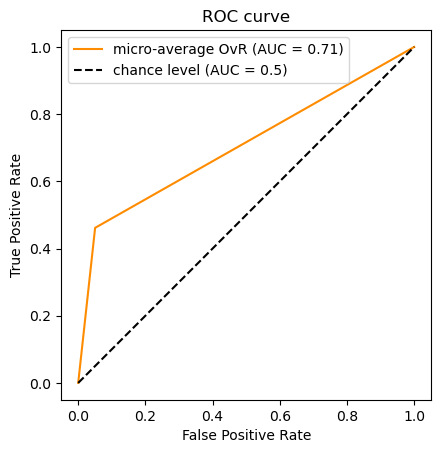

Learning rate:  0.75
Accuracy for Gradient Boost Classifier: 0.834653891038634


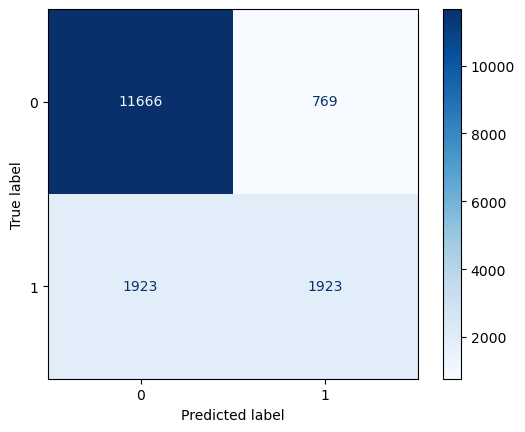

Sensitivity :  0.5
Specificity :  0.9381584238037797
Precision :  0.7143387815750372
F measure:  0.5882532884674212
F-beta measure:  0.657930751334337
Kappa:  0.48881136151102766


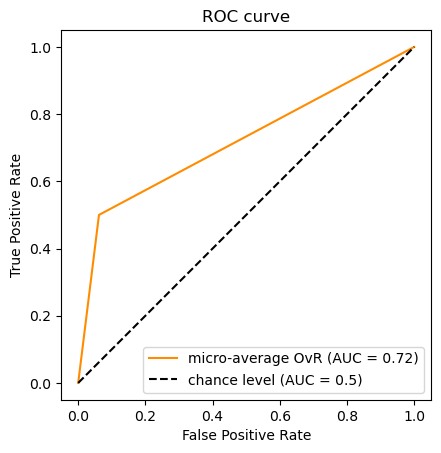

Learning rate:  1
Accuracy for Gradient Boost Classifier: 0.8331797801117867


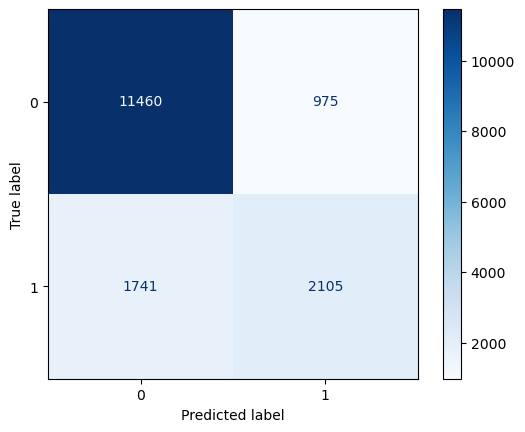

Sensitivity :  0.547321892875715
Specificity :  0.9215922798552473
Precision :  0.6834415584415584
F measure:  0.6078544614496101
F-beta measure:  0.6510577755783743
Kappa:  0.5035502862519123


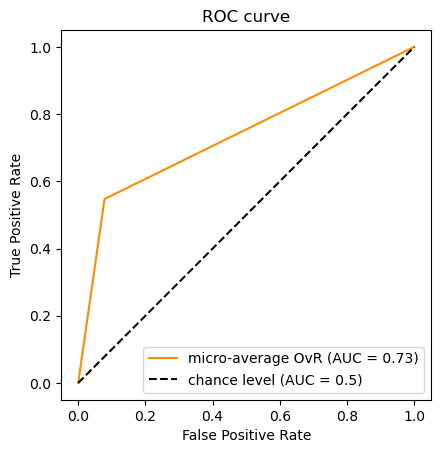

In [31]:
lr_list = [0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(train_set, class_column)
    y_pred = gb_clf.predict(test_set)

    print("Learning rate: ", learning_rate)
    print("Accuracy for Gradient Boost Classifier:", metrics.accuracy_score(class_column_test, y_pred))

    cm = confusion_matrix(class_column_test, y_pred)
    plot_confusion_matrix(gb_clf, test_set, class_column_test, cmap=plt.cm.Blues)
    plt.show()

    sensitivity = cm[1,1]/(cm[1,1]+cm[1,0])
    print('Sensitivity : ', sensitivity )

    specificity = cm[0,0]/(cm[0,1]+cm[0,0])
    print('Specificity : ', specificity)

    precision = cm[1,1]/(cm[0,1]+cm[1,1])
    print('Precision : ', precision)

    f1 = f1_score(class_column_test, y_pred)
    print('F measure: ', f1)

    fbeta = fbeta_score(class_column_test, y_pred, beta=0.5)
    print('F-beta measure: ', fbeta)

    cohen_score = cohen_kappa_score(class_column_test, y_pred)
    print('Kappa: ', cohen_score)

    RocCurveDisplay.from_predictions(
        class_column_test.ravel(),
        y_pred.ravel(),
        name="micro-average OvR",
        color="darkorange",
    )
    plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
    plt.axis("square")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC curve")
    plt.legend()
    plt.show()

<h4>Evaluacija za XGBoost Classifier</h4>

Accuracy for XGBoost Classifier: 0.8713838216325779
Cross Validation Scores:  [0.86920479 0.87469287 0.87960688 0.86240786 0.87285012 0.87407862
 0.872543   0.87684275 0.87837838 0.86455774]
Average CV Score:  0.8725163020641988
Number of CV Scores used in Average:  10


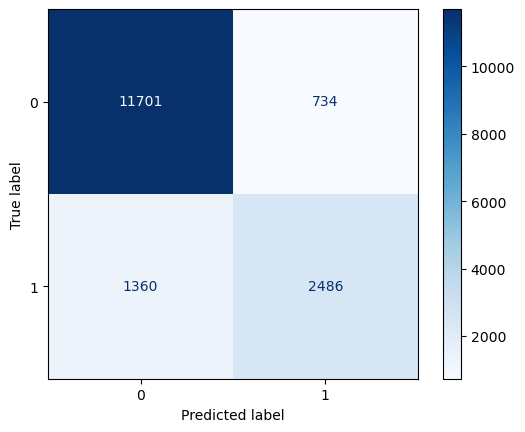

Sensitivity :  0.6463858554342173
Specificity :  0.94097305991154
Precision :  0.7720496894409938
F measure:  0.703651287857345
F-beta measure:  0.7431543704412293
Kappa:  0.6223422458904961


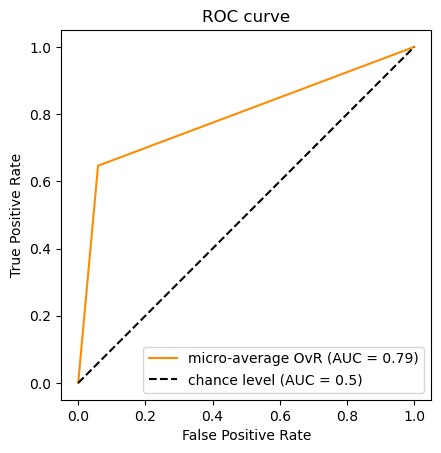

In [45]:
xgb_clf = XGBClassifier()
xgb_clf.fit(train_set, class_column)
y_pred = xgb_clf.predict(test_set)

print("Accuracy for XGBoost Classifier:", metrics.accuracy_score(class_column_test, y_pred))

#Cross-validation
k_folds = KFold(n_splits = 10)
scores = cross_val_score(xgb_clf, train_set, class_column, cv = k_folds)
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

cm = confusion_matrix(class_column_test, y_pred)
plot_confusion_matrix(xgb_clf, test_set, class_column_test, cmap=plt.cm.Blues)
plt.show()

sensitivity = cm[1,1]/(cm[1,1]+cm[1,0])
print('Sensitivity : ', sensitivity )

specificity = cm[0,0]/(cm[0,1]+cm[0,0])
print('Specificity : ', specificity)

precision = cm[1,1]/(cm[0,1]+cm[1,1])
print('Precision : ', precision)

f1 = f1_score(class_column_test, y_pred)
print('F measure: ', f1)

fbeta = fbeta_score(class_column_test, y_pred, beta=0.5)
print('F-beta measure: ', fbeta)

cohen_score = cohen_kappa_score(class_column_test, y_pred)
print('Kappa: ', cohen_score)

RocCurveDisplay.from_predictions(
    class_column_test.ravel(),
    y_pred.ravel(),
    name="micro-average OvR",
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve")
plt.legend()
plt.show()

<h3>Evaluacija za balansiran one-hot encoding dataset</h3>

<h4>Evaluacija za Random Forest Classifier</h4>

Accuracy, n_estimators=1000, max_features=sqrt: 0.8473680977826915
Cross Validation Scores:  [0.84668285 0.8592233  0.85052589 0.85234628 0.85760518 0.85517799
 0.90978964 0.99635922 0.99372977 0.99514563]
Average CV Score:  0.9016585760517799
Number of CV Scores used in Average:  10


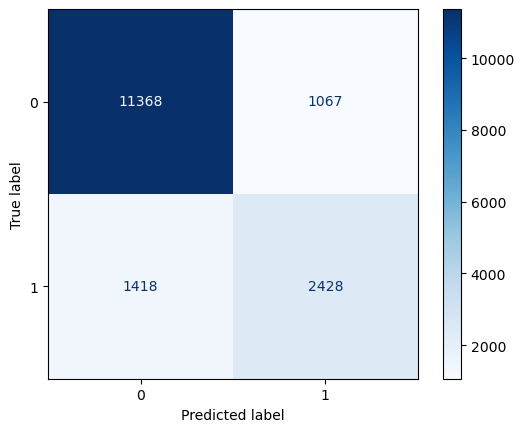

Sensitivity :  0.6313052522100884
Specificity :  0.9141938078005629
Precision :  0.6947067238912732
F measure:  0.6614902601825364
F-beta measure:  0.681027712330304
Kappa:  0.5632518780830384


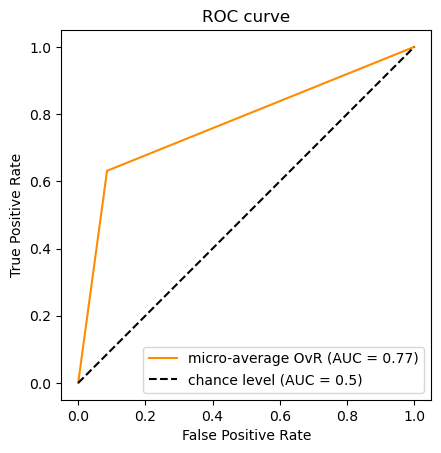

In [46]:
#Balansirani one-hot encoding dataset
train_set = X
class_column = Y

rf=RandomForestClassifier(n_estimators=1000)
rf.fit(train_set, class_column)
y_pred = rf.predict(test_set)
print("Accuracy, n_estimators=1000, max_features=sqrt:", metrics.accuracy_score(class_column_test, y_pred))

#Cross-validation
k_folds = KFold(n_splits = 10)
scores = cross_val_score(rf, train_set, class_column, cv = k_folds)
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

cm = confusion_matrix(class_column_test, y_pred)
plot_confusion_matrix(rf, test_set, class_column_test, cmap=plt.cm.Blues)
plt.show()

sensitivity = cm[1,1]/(cm[1,1]+cm[1,0])
print('Sensitivity : ', sensitivity )

specificity = cm[0,0]/(cm[0,1]+cm[0,0])
print('Specificity : ', specificity)

precision = cm[1,1]/(cm[0,1]+cm[1,1])
print('Precision : ', precision)

f1 = f1_score(class_column_test, y_pred)
print('F measure: ', f1)

fbeta = fbeta_score(class_column_test, y_pred, beta=0.5)
print('F-beta measure: ', fbeta)

cohen_score = cohen_kappa_score(class_column_test, y_pred)
print('Kappa: ', cohen_score)

RocCurveDisplay.from_predictions(
    class_column_test.ravel(),
    y_pred.ravel(),
    name="micro-average OvR",
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve")
plt.legend()
plt.show()

<h4>Evaluacija za SVM Classifier</h4>

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
#SVM classifier
train_set = X
class_column = Y

cols = train_set.columns

sc = StandardScaler()
sc.fit(train_set)
X_train_std = sc.transform(train_set)
X_test_std = sc.transform(test_set)

X_train_std = pd.DataFrame(X_train_std, columns=cols)
X_test_std = pd.DataFrame(X_test_std, columns=cols)

# Instantiate the Support Vector Classifier (SVC)
svc = SVC(C=1.0, random_state=1, kernel='linear')
# Fit the model
svc.fit(X_train_std, class_column)

# Make the predictions
y_predict = svc.predict(X_test_std)
# Measure the performance
print("Accuracy score %.3f" %metrics.accuracy_score(class_column_test, y_predict))

#Cross-validation
k_folds = KFold(n_splits = 10)
scores = cross_val_score(svc, X_train_std, class_column, cv = k_folds)
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Accuracy score 0.850
Cross Validation Scores:  [0.83940129 0.85173948 0.84223301 0.85517799 0.84951456 0.85133495
 0.90716019 0.99656149 0.99716828 0.99635922]
Average CV Score:  0.8986650485436893
Number of CV Scores used in Average:  10


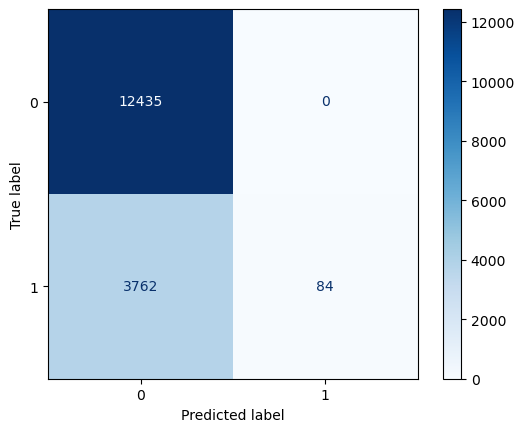

Sensitivity :  0.7566302652106084
Specificity :  0.6882991556091677
Precision :  0.4288240495137047
F measure:  0.5474040632054176
F-beta measure:  0.46950629235237173
Kappa:  0.35200096475086207


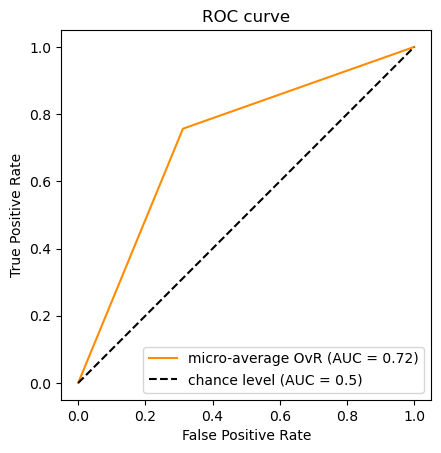

In [22]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import RocCurveDisplay

y_pred = y_predict

cm = confusion_matrix(class_column_test, y_pred)
plot_confusion_matrix(svc, test_set, class_column_test, cmap=plt.cm.Blues)
plt.show()

sensitivity = cm[1,1]/(cm[1,1]+cm[1,0])
print('Sensitivity : ', sensitivity )

specificity = cm[0,0]/(cm[0,1]+cm[0,0])
print('Specificity : ', specificity)

precision = cm[1,1]/(cm[0,1]+cm[1,1])
print('Precision : ', precision)

f1 = f1_score(class_column_test, y_pred)
print('F measure: ', f1)

fbeta = fbeta_score(class_column_test, y_pred, beta=0.5)
print('F-beta measure: ', fbeta)

cohen_score = cohen_kappa_score(class_column_test, y_pred)
print('Kappa: ', cohen_score)

RocCurveDisplay.from_predictions(
    class_column_test.ravel(),
    y_pred.ravel(),
    name="micro-average OvR",
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve")
plt.legend()
plt.show()

<h4>Evaluacija za Logistic Regeression Classifier</h4>

In [18]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16)

# fit the model with data
logreg.fit(train_set, class_column)

y_pred = logreg.predict(test_set)

# Measure the performance
print("Accuracy score %.3f" %metrics.accuracy_score(class_column_test, y_pred))


Accuracy score 0.656


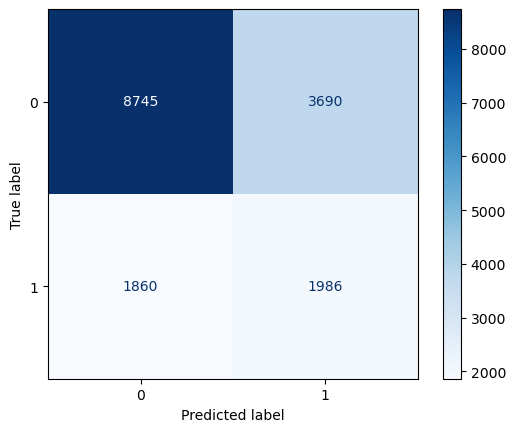

Sensitivity :  0.516380655226209
Specificity :  0.7032569360675512
Precision :  0.3498942917547569
F measure:  0.4171392564587272
F-beta measure:  0.3740112994350283
Kappa:  0.18863911312318116


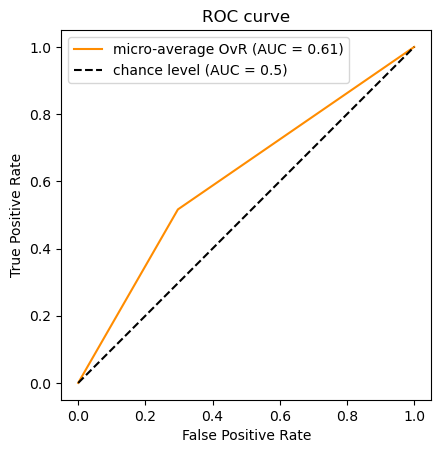

In [39]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import RocCurveDisplay

cm = confusion_matrix(class_column_test, y_pred)
plot_confusion_matrix(logreg, test_set, class_column_test, cmap=plt.cm.Blues)
plt.show()

sensitivity = cm[1,1]/(cm[1,1]+cm[1,0])
print('Sensitivity : ', sensitivity )

specificity = cm[0,0]/(cm[0,1]+cm[0,0])
print('Specificity : ', specificity)

precision = cm[1,1]/(cm[0,1]+cm[1,1])
print('Precision : ', precision)

f1 = f1_score(class_column_test, y_pred)
print('F measure: ', f1)

fbeta = fbeta_score(class_column_test, y_pred, beta=0.5)
print('F-beta measure: ', fbeta)

cohen_score = cohen_kappa_score(class_column_test, y_pred)
print('Kappa: ', cohen_score)

RocCurveDisplay.from_predictions(
    class_column_test.ravel(),
    y_pred.ravel(),
    name="micro-average OvR",
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve")
plt.legend()
plt.show()

<h4>Evaluacija za KNN Classifier</h4>

Evaluacija je radjena za KNN klasifikator, koji je dao najbolju tacnost, pri cemu su parametri:
    metric='manhattan',
    n_neighbors=28.

In [19]:
# KNN classifier
knn = KNeighborsClassifier(metric='manhattan', n_neighbors=28)
knn.fit(train_set, class_column)
y_pred =  knn.predict(test_set)
print(" Accuracy for KNN Classifier:", metrics.accuracy_score(class_column_test, y_pred))

#Cross-validation
k_folds = KFold(n_splits = 10)
scores = cross_val_score(knn, X_train_std, class_column, cv = k_folds)
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

 Accuracy for KNN Classifier: 0.6621214913088876
Cross Validation Scores:  [0.82746764 0.83616505 0.82665858 0.83252427 0.84425566 0.8387945
 0.89765372 0.98907767 0.99453883 0.99190939]
Average CV Score:  0.8879045307443366
Number of CV Scores used in Average:  10


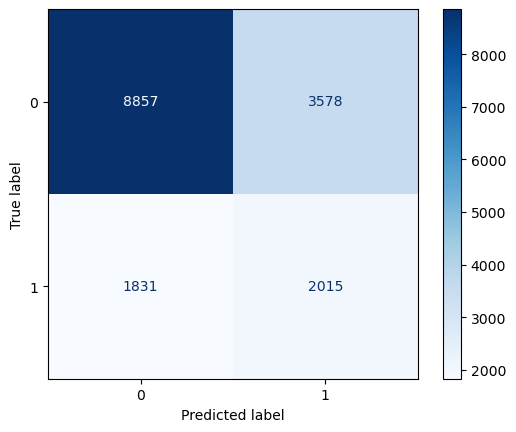

Sensitivity :  0.5239209568382736
Specificity :  0.7122637716123844
Precision :  0.3602717682817808
F measure:  0.42695200762792673
F-beta measure:  0.38427797696239224
Kappa:  0.20415772796102138


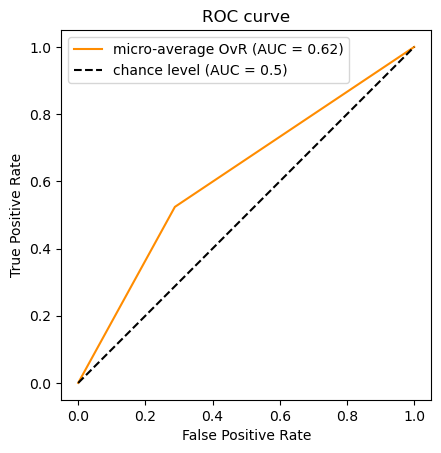

In [41]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import RocCurveDisplay

cm = confusion_matrix(class_column_test, y_pred)
plot_confusion_matrix(knn, test_set, class_column_test, cmap=plt.cm.Blues)
plt.show()

sensitivity = cm[1,1]/(cm[1,1]+cm[1,0])
print('Sensitivity : ', sensitivity )

specificity = cm[0,0]/(cm[0,1]+cm[0,0])
print('Specificity : ', specificity)

precision = cm[1,1]/(cm[0,1]+cm[1,1])
print('Precision : ', precision)

f1 = f1_score(class_column_test, y_pred)
print('F measure: ', f1)

fbeta = fbeta_score(class_column_test, y_pred, beta=0.5)
print('F-beta measure: ', fbeta)

cohen_score = cohen_kappa_score(class_column_test, y_pred)
print('Kappa: ', cohen_score)

RocCurveDisplay.from_predictions(
    class_column_test.ravel(),
    y_pred.ravel(),
    name="micro-average OvR",
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve")
plt.legend()
plt.show()

<h4>Evaluacija za Decision Tree Classifier</h4>

Evaluacija je radjena za klasifikator stablo odluke, koji je dao najbolju tacnost, pri cemu su parametri: max_depth = 10, random_state=42.

In [20]:
dt = DecisionTreeClassifier(max_depth = 10, random_state=42)
dt = dt.fit(train_set, class_column)
y_pred = dt.predict(test_set)
print(" Accuracy for Decision Tree Classifier", metrics.accuracy_score(class_column_test, y_pred))

#Cross-validation
k_folds = KFold(n_splits = 10)
scores = cross_val_score(dt, X_train_std, class_column, cv = k_folds)
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

 Accuracy for Decision Tree Classifier 0.828757447331245
Cross Validation Scores:  [0.8282767  0.81978155 0.81735437 0.81816343 0.82018608 0.82969256
 0.88410194 0.96541262 0.96966019 0.96561489]
Average CV Score:  0.8718244336569579
Number of CV Scores used in Average:  10


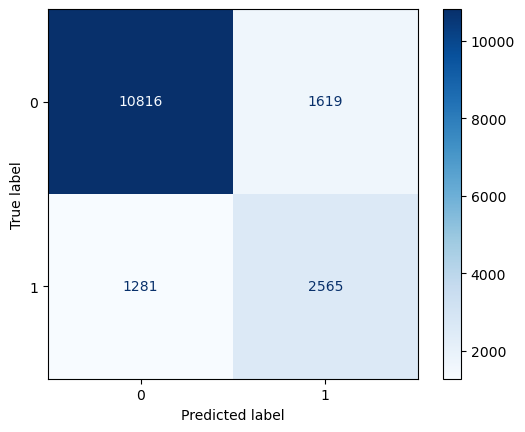

Sensitivity :  0.6669266770670826
Specificity :  0.8698029754724568
Precision :  0.6130497131931166
F measure:  0.638854296388543
F-beta measure:  0.623117286949762
Kappa:  0.5209191893320618


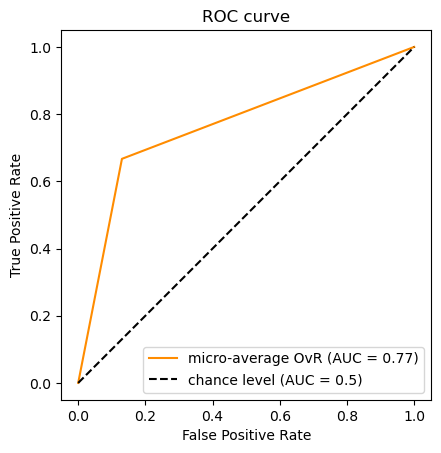

In [43]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import RocCurveDisplay

cm = confusion_matrix(class_column_test, y_pred)
plot_confusion_matrix(dt, test_set, class_column_test, cmap=plt.cm.Blues)
plt.show()

sensitivity = cm[1,1]/(cm[1,1]+cm[1,0])
print('Sensitivity : ', sensitivity )

specificity = cm[0,0]/(cm[0,1]+cm[0,0])
print('Specificity : ', specificity)

precision = cm[1,1]/(cm[0,1]+cm[1,1])
print('Precision : ', precision)

f1 = f1_score(class_column_test, y_pred)
print('F measure: ', f1)

fbeta = fbeta_score(class_column_test, y_pred, beta=0.5)
print('F-beta measure: ', fbeta)

cohen_score = cohen_kappa_score(class_column_test, y_pred)
print('Kappa: ', cohen_score)

RocCurveDisplay.from_predictions(
    class_column_test.ravel(),
    y_pred.ravel(),
    name="micro-average OvR",
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve")
plt.legend()
plt.show()

<h4>Evaluacija za XGBoost Classifier</h4>

In [22]:
train_set = X
class_column = Y

xgb_clf = XGBClassifier()
xgb_clf.fit(train_set, class_column)
y_pred = xgb_clf.predict(test_set)

print("Accuracy for XGBoost Classifier:", metrics.accuracy_score(class_column_test, y_pred))

#Cross-validation
k_folds = KFold(n_splits = 10)
scores = cross_val_score(xgb_clf, X_train_std, class_column, cv = k_folds)
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Accuracy for XGBoost Classifier: 0.8676985443154598
Cross Validation Scores:  [0.86266181 0.87398867 0.86852751 0.86771845 0.87075243 0.87661812
 0.91949838 0.99676375 0.99676375 0.99757282]
Average CV Score:  0.9130865695792879
Number of CV Scores used in Average:  10


Accuracy for XGBoost Classifier: 0.8689883913764511


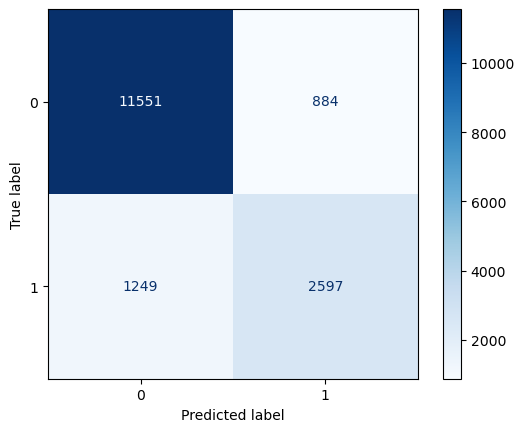

Sensitivity :  0.6752470098803952
Specificity :  0.9289103337354242
Precision :  0.7460499856363114
F measure:  0.7088849460898047
F-beta measure:  0.7307259425998874
Kappa:  0.6246299533908192


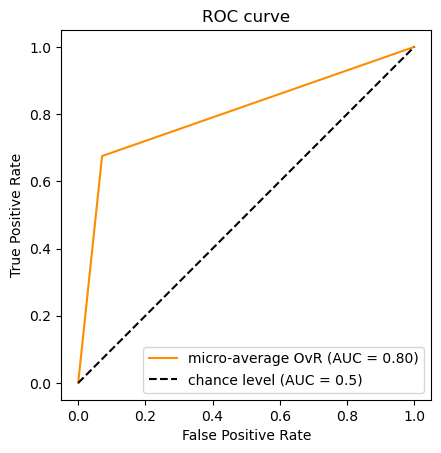

In [35]:
cm = confusion_matrix(class_column_test, y_pred)
plot_confusion_matrix(xgb_clf, test_set, class_column_test, cmap=plt.cm.Blues)
plt.show()

sensitivity = cm[1,1]/(cm[1,1]+cm[1,0])
print('Sensitivity : ', sensitivity )

specificity = cm[0,0]/(cm[0,1]+cm[0,0])
print('Specificity : ', specificity)

precision = cm[1,1]/(cm[0,1]+cm[1,1])
print('Precision : ', precision)

f1 = f1_score(class_column_test, y_pred)
print('F measure: ', f1)

fbeta = fbeta_score(class_column_test, y_pred, beta=0.5)
print('F-beta measure: ', fbeta)

cohen_score = cohen_kappa_score(class_column_test, y_pred)
print('Kappa: ', cohen_score)

RocCurveDisplay.from_predictions(
    class_column_test.ravel(),
    y_pred.ravel(),
    name="micro-average OvR",
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve")
plt.legend()
plt.show()

<h1>Feature selection</h1>

<h2>Select K best</h2>

In [17]:
#apply SelectKBest class to extract top 10 best features
k = 60
bestfeatures = SelectKBest(score_func = chi2, k = k)
fit = bestfeatures.fit(train_set_onehot_unbalanced, class_column)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(train_set_onehot_unbalanced.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(k,'Score'))  #print 10 best features

                                   Specs         Score
2                           Capital-gain  8.219247e+07
3                           Capital-loss  1.372146e+06
1                                 Fnlwgt  1.711477e+05
0                                    Age  8.600612e+03
4                         Hours-per-week  6.476409e+03
39     Martial-status_Married-civ-spouse  3.477516e+03
7                   Relationship_Husband  3.114942e+03
41          Martial-status_Never-married  2.218522e+03
10                Relationship_Own-child  1.435873e+03
47            Occupation_Exec-managerial  1.315483e+03
5                             Sex_Female  1.016447e+03
33                     Education_Masters  9.397752e+02
30                   Education_Bachelors  8.862352e+02
8             Relationship_Not-in-family  8.618462e+02
35                 Education_Prof-school  7.675161e+02
51              Occupation_Other-service  7.153961e+02
17                Workclass_Self-emp-inc  6.116342e+02
11        

In [18]:
df_selected_features = df
df_selected_features = df_selected_features[featureScores.nlargest(k,'Score')['Specs'].values]

In [19]:
train_set_selected_features = df_selected_features
test_set_selected_features = test_set[featureScores.nlargest(k,'Score')['Specs'].values]

Accuracy for XGBoost Classifier: 0.8724894048277133


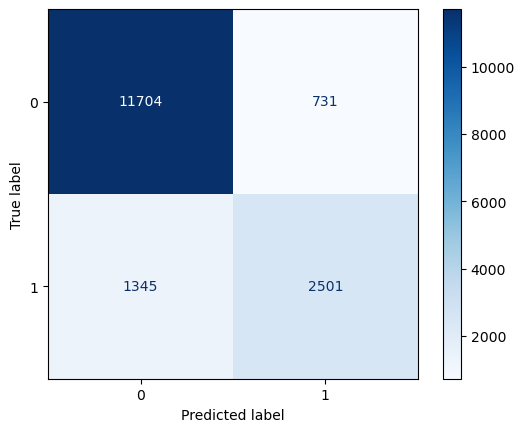

Sensitivity :  0.6502860114404576
Specificity :  0.9412143144350623
Precision :  0.7738242574257426
F measure:  0.7066968070076293
F-beta measure:  0.7454989865267676
Kappa:  0.6260155779208403


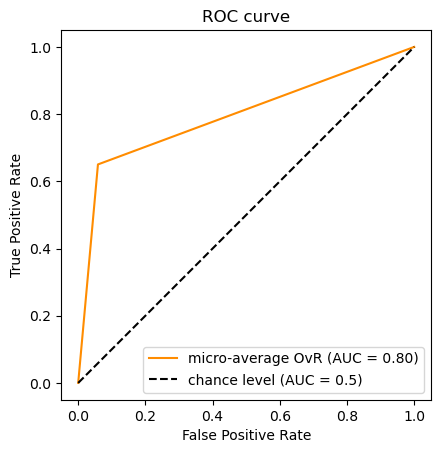

In [20]:
xgb_clf = XGBClassifier()
xgb_clf.fit(train_set_selected_features, class_column)
y_pred = xgb_clf.predict(test_set_selected_features)

print("Accuracy for XGBoost Classifier:", metrics.accuracy_score(class_column_test, y_pred))

cm = confusion_matrix(class_column_test, y_pred)
plot_confusion_matrix(xgb_clf, test_set_selected_features, class_column_test, cmap=plt.cm.Blues)
plt.show()

sensitivity = cm[1,1]/(cm[1,1]+cm[1,0])
print('Sensitivity : ', sensitivity )

specificity = cm[0,0]/(cm[0,1]+cm[0,0])
print('Specificity : ', specificity)

precision = cm[1,1]/(cm[0,1]+cm[1,1])
print('Precision : ', precision)

f1 = f1_score(class_column_test, y_pred)
print('F measure: ', f1)

fbeta = fbeta_score(class_column_test, y_pred, beta=0.5)
print('F-beta measure: ', fbeta)

cohen_score = cohen_kappa_score(class_column_test, y_pred)
print('Kappa: ', cohen_score)

RocCurveDisplay.from_predictions(
    class_column_test.ravel(),
    y_pred.ravel(),
    name="micro-average OvR",
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve")
plt.legend()
plt.show()

<h2>Feature importance</h2>

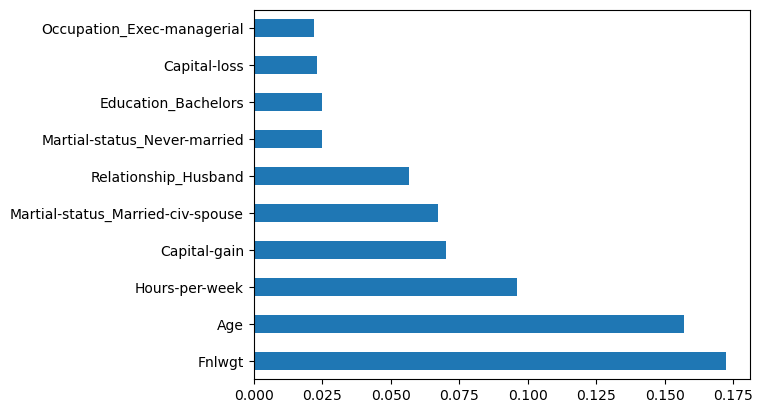

In [19]:
model = ExtraTreesClassifier()
model.fit(train_set_onehot_unbalanced, class_column)
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=train_set_onehot_unbalanced.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

<h2>Recursive Feature Elimination</h2>

In [47]:
from sklearn.feature_selection._rfe import RFE
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
n_features = 60
rfe = RFE(model, n_features_to_select = n_features)
fit = rfe.fit(train_set_onehot_unbalanced, class_column)

# Get the feature names and their ranking
features = train_set.columns
ranking = rfe.ranking_

# Create a dictionary of features and their rankings
feature_dict = dict(zip(features, ranking))

# Sort the features by their ranking
sorted_features = sorted(feature_dict, key=feature_dict.get)

# Print the 3 features with the highest ranking
print("Top features: ", sorted_features[:n_features])

Top features:  ['Age', 'Fnlwgt', 'Capital-gain', 'Capital-loss', 'Hours-per-week', 'Sex_Female', 'Sex_Male', 'Relationship_Husband', 'Relationship_Not-in-family', 'Relationship_Other-relative', 'Relationship_Own-child', 'Relationship_Unmarried', 'Relationship_Wife', 'Workclass_Federal-gov', 'Workclass_Private', 'Workclass_Self-emp-inc', 'Workclass_Self-emp-not-inc', 'Workclass_State-gov', 'Education_10th', 'Education_11th', 'Education_12th', 'Education_1st-4th', 'Education_5th-6th', 'Education_7th-8th', 'Education_9th', 'Education_Assoc-acdm', 'Education_Assoc-voc', 'Education_Bachelors', 'Education_Doctorate', 'Education_HS-grad', 'Education_Masters', 'Education_Preschool', 'Education_Prof-school', 'Education_Some-college', 'Martial-status_Divorced', 'Martial-status_Married-civ-spouse', 'Martial-status_Married-spouse-absent', 'Martial-status_Never-married', 'Martial-status_Separated', 'Martial-status_Widowed', 'Occupation_Adm-clerical', 'Occupation_Craft-repair', 'Occupation_Exec-mana

In [48]:
df_selected_features = df
df_selected_features = df_selected_features[sorted_features[:n_features]]

train_set_selected_features = df_selected_features
test_set_selected_features = test_set[sorted_features[:n_features]]

Accuracy for XGBoost Classifier: 0.8713838216325779


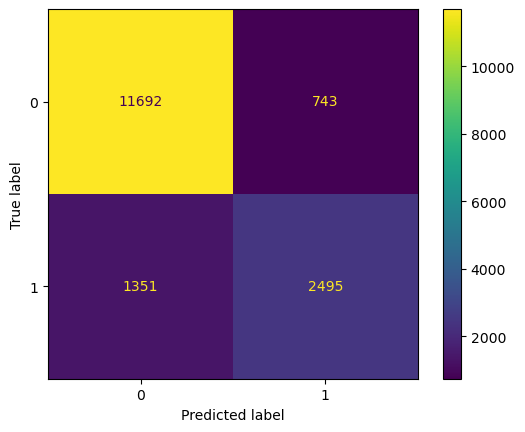

Sensitivity :  0.6487259490379615
Specificity :  0.9402492963409731
Precision :  0.7705373687461395
F measure:  0.7044042913608131
F-beta measure:  0.7426479342778901
Kappa:  0.6229879165179847


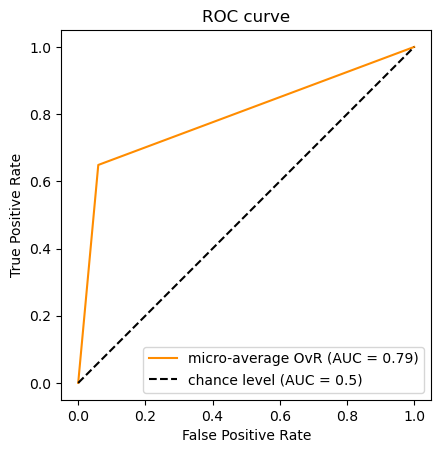

In [56]:
xgb_clf = XGBClassifier()
xgb_clf.fit(train_set_selected_features, class_column)
y_pred = xgb_clf.predict(test_set_selected_features)

print("Accuracy for XGBoost Classifier:", metrics.accuracy_score(class_column_test, y_pred))

cm = confusion_matrix(class_column_test, y_pred)
#plot_confusion_matrix(xgb_clf, test_set_selected_features, class_column_test, cmap=plt.cm.Blues)
#plt.show()

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

sensitivity = cm[1,1]/(cm[1,1]+cm[1,0])
print('Sensitivity : ', sensitivity )

specificity = cm[0,0]/(cm[0,1]+cm[0,0])
print('Specificity : ', specificity)

precision = cm[1,1]/(cm[0,1]+cm[1,1])
print('Precision : ', precision)

f1 = f1_score(class_column_test, y_pred)
print('F measure: ', f1)

fbeta = fbeta_score(class_column_test, y_pred, beta=0.5)
print('F-beta measure: ', fbeta)

cohen_score = cohen_kappa_score(class_column_test, y_pred)
print('Kappa: ', cohen_score)

RocCurveDisplay.from_predictions(
    class_column_test.ravel(),
    y_pred.ravel(),
    name="micro-average OvR",
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve")
plt.legend()
plt.show()

<h2>Principal Component Analysis</h2>

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(train_set_under_sample)
x_scaled = scaler.transform(train_set_under_sample)

scaler.fit(test_set)
y_scaled = scaler.transform(test_set)

In [27]:
from sklearn.decomposition import PCA
pca_67 = PCA(n_components=67, random_state=2020)
pca_67.fit(x_scaled)
x_pca_67 = pca_67.transform(x_scaled)

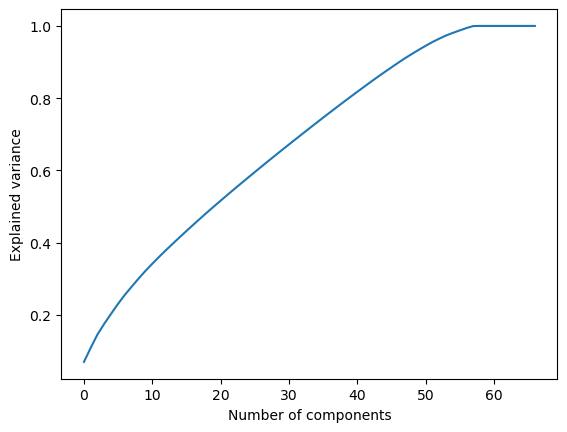

In [28]:
plt.plot(np.cumsum(pca_67.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.savefig('elbow_plot.png', dpi=100)

In [29]:
pca_95 = PCA(n_components=0.95, random_state=2020)
pca_95.fit(x_scaled)
X_pca_95 = pca_95.transform(x_scaled)

pca_52 = PCA(n_components=52, random_state=2020)
pca_52.fit(y_scaled)
y_pca_52 = pca_52.transform(y_scaled)

In [30]:
X_pca_95.shape

(15682, 52)

In [31]:
y_pca_52.shape

(16281, 52)

In [32]:
class_column_under_sample_array = class_column_under_sample.to_numpy()
class_column_test_array = class_column_test.to_numpy()

Accuracy for XGBoost Classifier: 0.44862109207051165


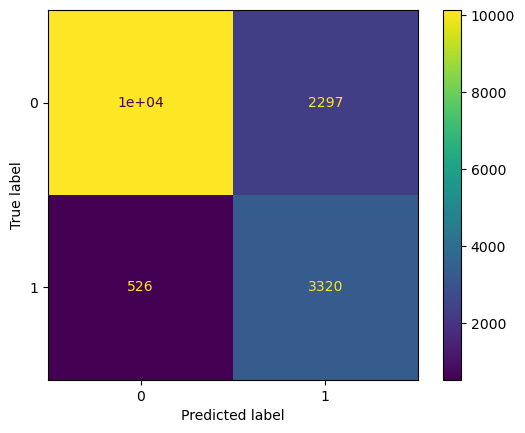

Sensitivity :  0.8632345293811753
Specificity :  0.8152794531564134
Precision :  0.5910628449350187
F measure:  0.14659188135754347
F-beta measure:  0.126236164778309
Kappa:  -0.21865395190204318


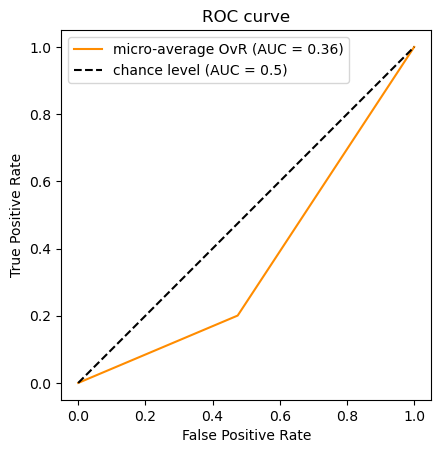

In [33]:
xgb_clf = XGBClassifier()
xgb_clf.fit(X_pca_95, class_column_under_sample)
y_pred = xgb_clf.predict(y_pca_52)

print("Accuracy for XGBoost Classifier:", metrics.accuracy_score(class_column_test, y_pred))

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

sensitivity = cm[1,1]/(cm[1,1]+cm[1,0])
print('Sensitivity : ', sensitivity )

specificity = cm[0,0]/(cm[0,1]+cm[0,0])
print('Specificity : ', specificity)

precision = cm[1,1]/(cm[0,1]+cm[1,1])
print('Precision : ', precision)

f1 = f1_score(class_column_test, y_pred)
print('F measure: ', f1)

fbeta = fbeta_score(class_column_test, y_pred, beta=0.5)
print('F-beta measure: ', fbeta)

cohen_score = cohen_kappa_score(class_column_test, y_pred)
print('Kappa: ', cohen_score)

RocCurveDisplay.from_predictions(
    class_column_test.ravel(),
    y_pred.ravel(),
    name="micro-average OvR",
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve")
plt.legend()
plt.show()

<h1>Undersampling</h1>

In [43]:
minority_class_len = len(df[df['Income'] == 1])
print(minority_class_len)

7841


In [44]:
majority_class_indices = df[df['Income'] == 0].index
print(majority_class_indices)

Int64Index([    0,     1,     2,     3,     4,     5,     6,    12,    13,
               15,
            ...
            32548, 32549, 32550, 32551, 32552, 32553, 32555, 32556, 32558,
            32559],
           dtype='int64', length=24720)


In [45]:
random_majority_indices = np.random.choice(majority_class_indices, minority_class_len, replace=False)
print(len(random_majority_indices))

7841


In [46]:
minority_class_indices = df[df['Income'] == 1].index
print(minority_class_indices)

Int64Index([    7,     8,     9,    10,    11,    14,    19,    20,    25,
               27,
            ...
            32530, 32532, 32533, 32536, 32538, 32539, 32545, 32554, 32557,
            32560],
           dtype='int64', length=7841)


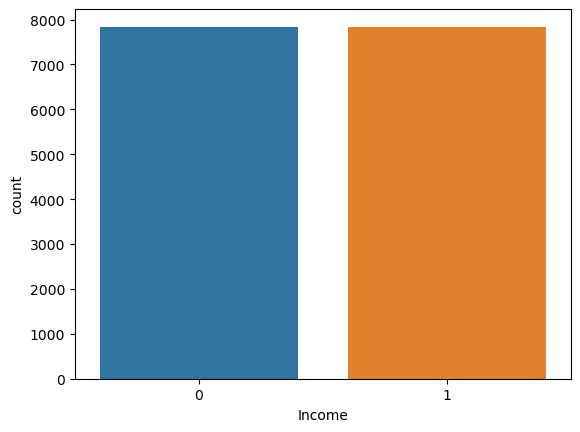

In [47]:
under_sample_indices = np.concatenate([minority_class_indices, random_majority_indices])
under_sample = df.loc[under_sample_indices]
sns.countplot(x = 'Income', data = under_sample)
train_set_under_sample = under_sample.drop(["Income"], axis = 1)
class_column_under_sample = under_sample["Income"]

Accuracy for XGBoost Classifier: 0.8266077022295928


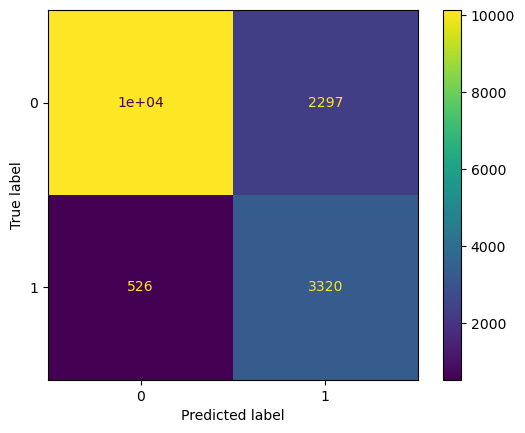

Sensitivity :  0.8632345293811753
Specificity :  0.8152794531564134
Precision :  0.5910628449350187
F measure:  0.7016802282574237
F-beta measure:  0.6308428973170177
Kappa:  0.5854159228870994


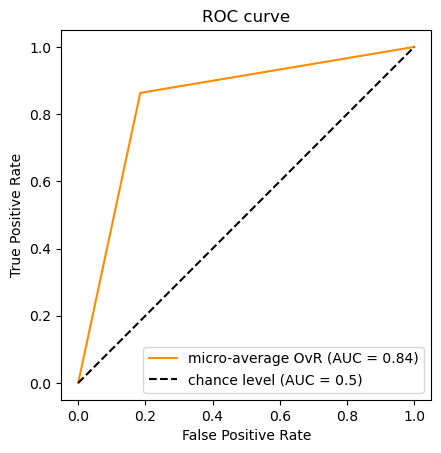

In [19]:
xgb_clf = XGBClassifier()
xgb_clf.fit(train_set_under_sample, class_column_under_sample)
y_pred = xgb_clf.predict(test_set)

print("Accuracy for XGBoost Classifier:", metrics.accuracy_score(class_column_test, y_pred))

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

sensitivity = cm[1,1]/(cm[1,1]+cm[1,0])
print('Sensitivity : ', sensitivity )

specificity = cm[0,0]/(cm[0,1]+cm[0,0])
print('Specificity : ', specificity)

precision = cm[1,1]/(cm[0,1]+cm[1,1])
print('Precision : ', precision)

f1 = f1_score(class_column_test, y_pred)
print('F measure: ', f1)

fbeta = fbeta_score(class_column_test, y_pred, beta=0.5)
print('F-beta measure: ', fbeta)

cohen_score = cohen_kappa_score(class_column_test, y_pred)
print('Kappa: ', cohen_score)

RocCurveDisplay.from_predictions(
    class_column_test.ravel(),
    y_pred.ravel(),
    name="micro-average OvR",
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve")
plt.legend()
plt.show()

<h2>Feature selection and undersampling</h2>

In [48]:
#apply SelectKBest class to extract top 10 best features
k = 60
bestfeatures = SelectKBest(score_func = chi2, k = k)
fit = bestfeatures.fit(train_set_under_sample, class_column_under_sample)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(train_set_under_sample.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

train_set_sfu = train_set_under_sample[featureScores.nlargest(k,'Score')['Specs'].values]
test_set_selected_features = test_set[featureScores.nlargest(k,'Score')['Specs'].values]

print(train_set_sfu.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15682 entries, 7 to 9082
Data columns (total 60 columns):
 #   Column                                Non-Null Count  Dtype
---  ------                                --------------  -----
 0   Capital-gain                          15682 non-null  int64
 1   Capital-loss                          15682 non-null  int64
 2   Fnlwgt                                15682 non-null  int64
 3   Age                                   15682 non-null  int64
 4   Hours-per-week                        15682 non-null  int64
 5   Martial-status_Never-married          15682 non-null  uint8
 6   Martial-status_Married-civ-spouse     15682 non-null  uint8
 7   Relationship_Husband                  15682 non-null  uint8
 8   Relationship_Own-child                15682 non-null  uint8
 9   Sex_Female                            15682 non-null  uint8
 10  Relationship_Not-in-family            15682 non-null  uint8
 11  Occupation_Exec-managerial            1568

Accuracy for XGBoost Classifier: 0.8233523739328051


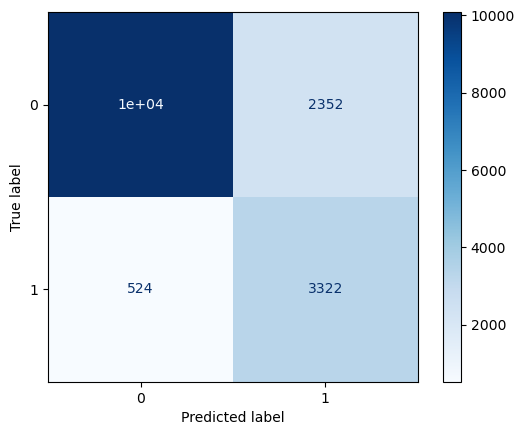

Sensitivity :  0.8637545501820073
Specificity :  0.8108564535585042
Precision :  0.5854776172012689
F measure:  0.6978991596638655
F-beta measure:  0.6258006178886292
Kappa:  0.5794893884468382


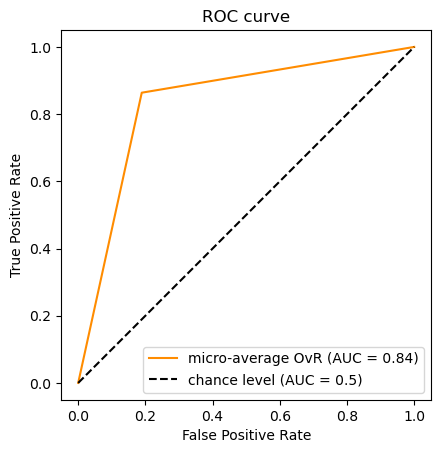

In [28]:
xgb_clf = XGBClassifier()
xgb_clf.fit(train_set_sfu, class_column_under_sample)
y_pred = xgb_clf.predict(test_set_selected_features)

print("Accuracy for XGBoost Classifier:", metrics.accuracy_score(class_column_test, y_pred))

cm = confusion_matrix(class_column_test, y_pred)
plot_confusion_matrix(xgb_clf, test_set_selected_features, class_column_test, cmap=plt.cm.Blues)
plt.show()

sensitivity = cm[1,1]/(cm[1,1]+cm[1,0])
print('Sensitivity : ', sensitivity )

specificity = cm[0,0]/(cm[0,1]+cm[0,0])
print('Specificity : ', specificity)

precision = cm[1,1]/(cm[0,1]+cm[1,1])
print('Precision : ', precision)

f1 = f1_score(class_column_test, y_pred)
print('F measure: ', f1)

fbeta = fbeta_score(class_column_test, y_pred, beta=0.5)
print('F-beta measure: ', fbeta)

cohen_score = cohen_kappa_score(class_column_test, y_pred)
print('Kappa: ', cohen_score)

RocCurveDisplay.from_predictions(
    class_column_test.ravel(),
    y_pred.ravel(),
    name="micro-average OvR",
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve")
plt.legend()
plt.show()


<h1>Ada Boosting</h1>

Accuracy for XGBoost Classifier: 0.8300472943922363


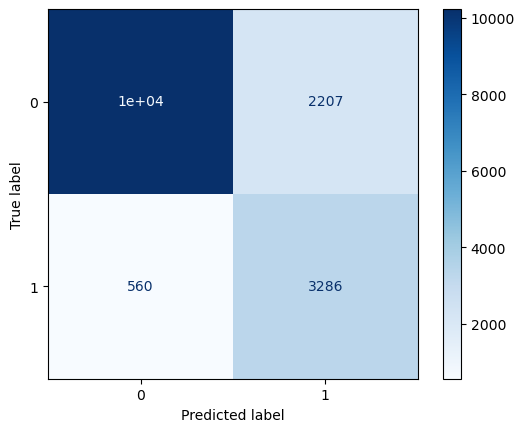

Sensitivity :  0.8543941757670307
Specificity :  0.8225170888620829
Precision :  0.5982159111596578
F measure:  0.7037156012421031
F-beta measure:  0.6363777209698659
Kappa:  0.5896983065054686


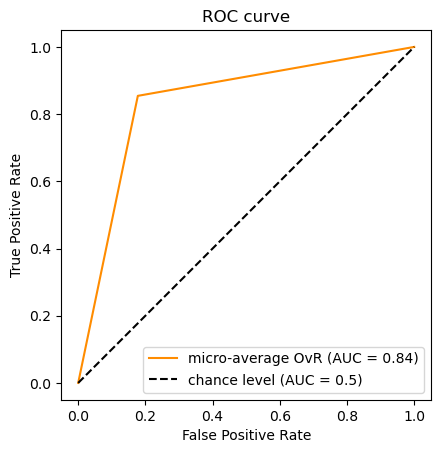

In [28]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=1)
AdaBoost = AdaBoostClassifier(base_estimator=model, n_estimators=400, learning_rate=1)
AdaBoost.fit(train_set_under_sample, class_column_under_sample)
y_pred = AdaBoost.predict(test_set)

print("Accuracy for XGBoost Classifier:", metrics.accuracy_score(class_column_test, y_pred))

cm = confusion_matrix(class_column_test, y_pred)
plot_confusion_matrix(AdaBoost, test_set, class_column_test, cmap=plt.cm.Blues)
plt.show()

sensitivity = cm[1,1]/(cm[1,1]+cm[1,0])
print('Sensitivity : ', sensitivity )

specificity = cm[0,0]/(cm[0,1]+cm[0,0])
print('Specificity : ', specificity)

precision = cm[1,1]/(cm[0,1]+cm[1,1])
print('Precision : ', precision)

f1 = f1_score(class_column_test, y_pred)
print('F measure: ', f1)

fbeta = fbeta_score(class_column_test, y_pred, beta=0.5)
print('F-beta measure: ', fbeta)

cohen_score = cohen_kappa_score(class_column_test, y_pred)
print('Kappa: ', cohen_score)

RocCurveDisplay.from_predictions(
    class_column_test.ravel(),
    y_pred.ravel(),
    name="micro-average OvR",
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve")
plt.legend()
plt.show()

<h1>Voting Classifier</h1>

In [54]:
from sklearn.svm import SVC

svm_clf = SVC(kernel="rbf", probability=True)
svm_clf.fit(train_set_sfu, class_column_under_sample)

rnd_clf = RandomForestClassifier(n_estimators = 100, n_jobs = -1, max_features = 'sqrt')
rnd_clf.fit(train_set_sfu, class_column_under_sample)

knn_clf = KNeighborsClassifier(n_neighbors = 28)
knn_clf.fit(train_set_sfu, class_column_under_sample)

KNeighborsClassifier(n_neighbors=28)

<h3>Hard Voting</h3>

In [49]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier([
    ("svm_clf", svm_clf),
    ("rnd_clf", rnd_clf),
    ("knn_clf", knn_clf)
], voting="hard")

In [50]:
voting_clf.fit(train_set_under_sample, class_column_under_sample)
y_pred = voting_clf.predict(test_set)

Accuracy:  0.7197423797984951


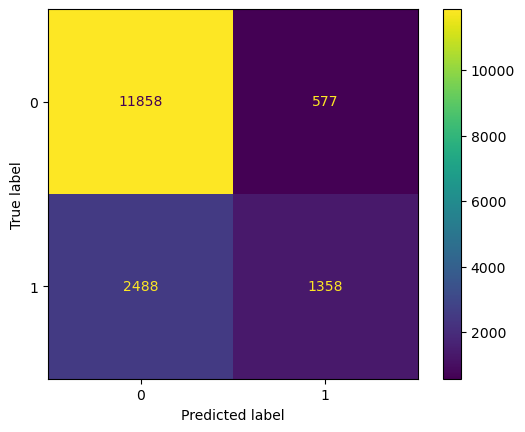

Sensitivity :  0.3530941237649506
Specificity :  0.9535987133092079
Precision :  0.7018087855297158
F measure:  0.46981491091506655
F-beta measure:  0.5860521318833074
Kappa:  0.3702232915786816


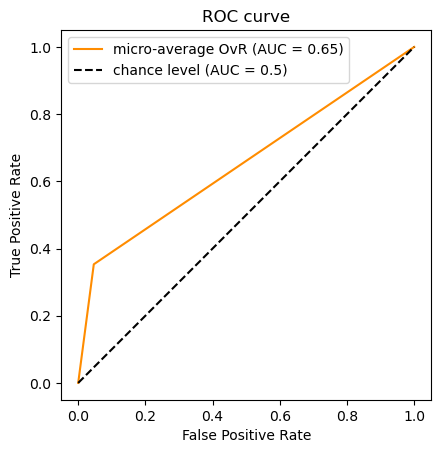

In [51]:
print("Accuracy: ", voting_clf.score(train_set_under_sample, class_column_under_sample))

cm = confusion_matrix(class_column_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

sensitivity = cm[1,1]/(cm[1,1]+cm[1,0])
print('Sensitivity : ', sensitivity )

specificity = cm[0,0]/(cm[0,1]+cm[0,0])
print('Specificity : ', specificity)

precision = cm[1,1]/(cm[0,1]+cm[1,1])
print('Precision : ', precision)

f1 = f1_score(class_column_test, y_pred)
print('F measure: ', f1)

fbeta = fbeta_score(class_column_test, y_pred, beta=0.5)
print('F-beta measure: ', fbeta)

cohen_score = cohen_kappa_score(class_column_test, y_pred)
print('Kappa: ', cohen_score)

RocCurveDisplay.from_predictions(
    class_column_test.ravel(),
    y_pred.ravel(),
    name="micro-average OvR",
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve")
plt.legend()
plt.show()

<h3>Soft Voting</h3>

In [55]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier([
    ("svm_clf", svm_clf),
    ("rnd_clf", rnd_clf),
    ("knn_clf", knn_clf)
], voting="soft")

In [58]:
voting_clf.fit(train_set_sfu, class_column_under_sample)
y_pred = voting_clf.predict(test_set_selected_features)

Accuracy:  0.9815712281596735


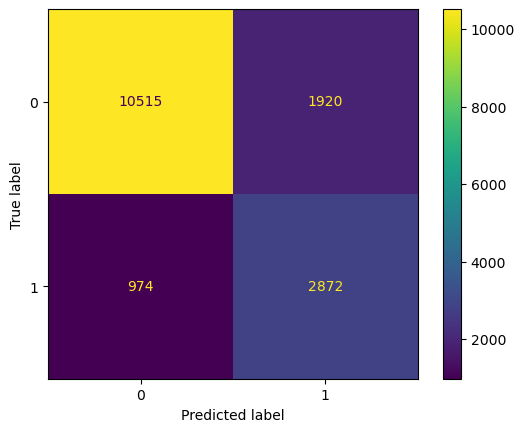

Sensitivity :  0.7467498699947998
Specificity :  0.8455971049457177
Precision :  0.5993322203672788
F measure:  0.6649687427645288
F-beta measure:  0.6239680194664117
Kappa:  0.545968519997463


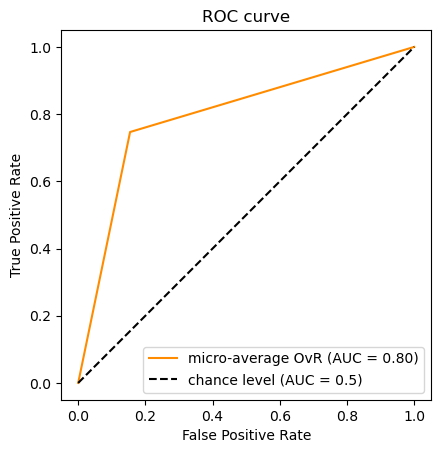

In [60]:
print("Accuracy: ", voting_clf.score(train_set_sfu, class_column_under_sample))

cm = confusion_matrix(class_column_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

sensitivity = cm[1,1]/(cm[1,1]+cm[1,0])
print('Sensitivity : ', sensitivity )

specificity = cm[0,0]/(cm[0,1]+cm[0,0])
print('Specificity : ', specificity)

precision = cm[1,1]/(cm[0,1]+cm[1,1])
print('Precision : ', precision)

f1 = f1_score(class_column_test, y_pred)
print('F measure: ', f1)

fbeta = fbeta_score(class_column_test, y_pred, beta=0.5)
print('F-beta measure: ', fbeta)

cohen_score = cohen_kappa_score(class_column_test, y_pred)
print('Kappa: ', cohen_score)

RocCurveDisplay.from_predictions(
    class_column_test.ravel(),
    y_pred.ravel(),
    name="micro-average OvR",
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve")
plt.legend()
plt.show()